# Project 2

In [1]:
# Library
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
# Some functions

find_personalized_network = function(graph, target_node)
{
    cat("\n\nPersonalized network of Node", target_node, ":")

    target_network_nodes = neighborhood(graph, order=1, nodes=target_node)

    # Personalized network of target node
    target_node_network = induced.subgraph(graph, unlist(target_network_nodes))

    # Nodes and edges
    cat("\nNumber of nodes:" , vcount(target_node_network))
    cat("\nNumber of edges:", ecount(target_node_network))

    # Diameter
    cat("\nDiameter: ", diameter(target_node_network))
    
    return (target_node_network)
}

display_communities = function(personalized_network, core_node)
{
    # Fast-Greedy
    fast_greedy_community = fastgreedy.community(personalized_network)
    cat("\nModularity of core node", core_node, "(Fast-Greedy):", modularity(fast_greedy_community))
    
    # Edge-Betweenness
    edge_betweenness_community = edge.betweenness.community(personalized_network)
    cat("\nModularity of core node", core_node, "(Edge-Betweenness):", modularity(edge_betweenness_community))
    
    # Infomap
    infomap_community = infomap.community(personalized_network)
    cat("\nModularity of core node", core_node, "(Infomap):", modularity(infomap_community))
    
    # Plot community
    # Fast-Greedy
    plot(personalized_network, vertex.size=4, vertex.label=NA, layout=layout.fruchterman.reingold,
         edge.color="grey50", vertex.color=fast_greedy_community$membership, 
         main=paste("Community structure of core node", core_node, "using Fast-Greedy"))
    
    plot(fast_greedy_community, personalized_network, vertex.size=4, vertex.label=NA, 
         edge.color="grey50", layout=layout.fruchterman.reingold,
         main=paste("Community structure of core node", core_node, "using Fast-Greedy"))
    
    # Edge-Betweenness
    plot(personalized_network, vertex.size=4, vertex.label=NA, layout=layout.fruchterman.reingold,
         edge.color="grey50", vertex.color=edge_betweenness_community$membership, 
         main=paste("Community structure of core node", core_node, "using Edge-Betweenness"))
    
    plot(edge_betweenness_community, personalized_network, vertex.size=4, vertex.label=NA, 
         edge.color="grey50", layout=layout.fruchterman.reingold,
         main=paste("Community structure of core node", core_node, "using Edge-Betweenness"))
    
    # Infomap
    plot(personalized_network, vertex.size=4, vertex.label=NA, layout=layout.fruchterman.reingold,
         edge.color="grey50", vertex.color=infomap_community$membership, 
         main=paste("Community structure of core node", core_node, "using Infomap"))

    plot(infomap_community, personalized_network, vertex.size=4, vertex.label=NA, 
         edge.color="grey50", layout=layout.fruchterman.reingold,
         main=paste("Community structure of core node", core_node, "using Infomap"))
}

find_common_neighbors = function (graph, node_i, core)
{
    node_i_neighbors = neighbors(graph, node_i)
    core_node_neighbors = neighbors(graph, core)
    common_neighbors = intersect(node_i_neighbors, core_node_neighbors)
    return (common_neighbors)
}

find_distance = function (graph, node_i, node_j, upper_bound=10)
{
    cur_distance = distances(graph, node_i, node_j)
    if (cur_distance == Inf) # Set Inf case as diameter + constant
    {
        return (upper_bound)
    }
    else
    {
        return (cur_distance)
    }
}

#### 1.1

In [3]:
# Load the graph
facebook_net = read.graph("facebook_combined.txt", directed=FALSE)
V(facebook_net)$name = seq(1:vcount(facebook_net)) # Name for each node

Is the network connected:  TRUE
Diameter:  8

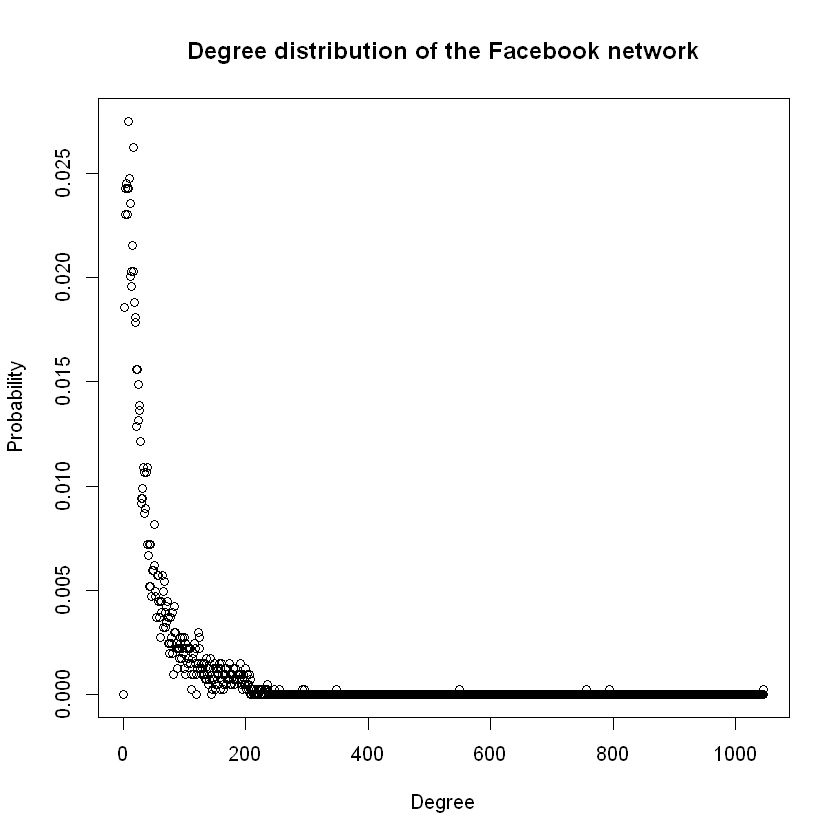


Slope:  -1.247526

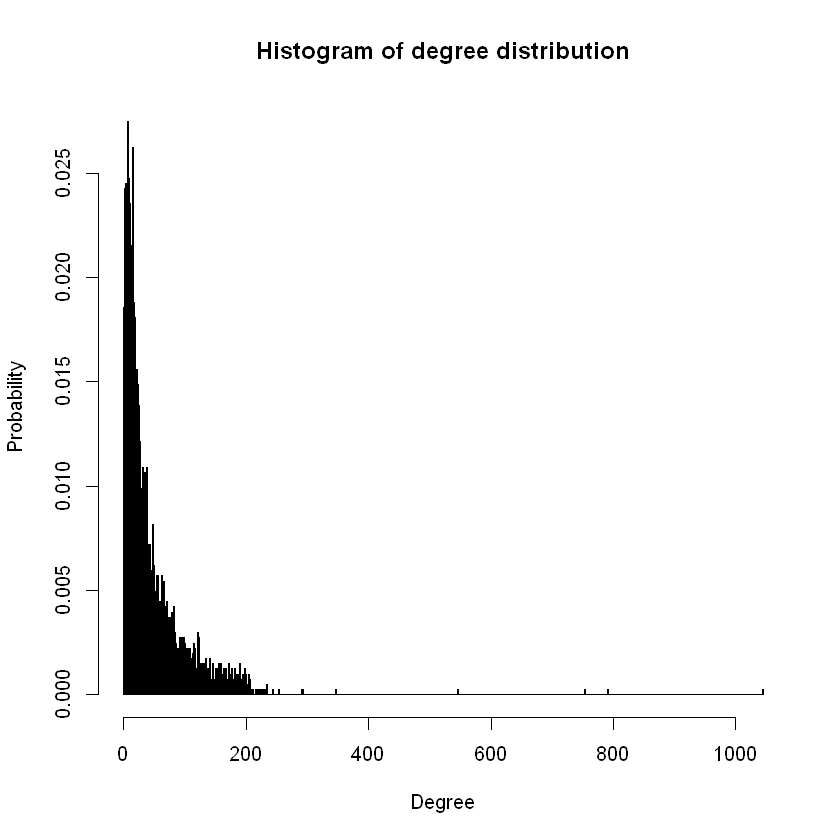


Call:
lm(formula = log_distribution ~ log_degree)

Coefficients:
(Intercept)   log_degree  
    -0.6611      -1.2475  



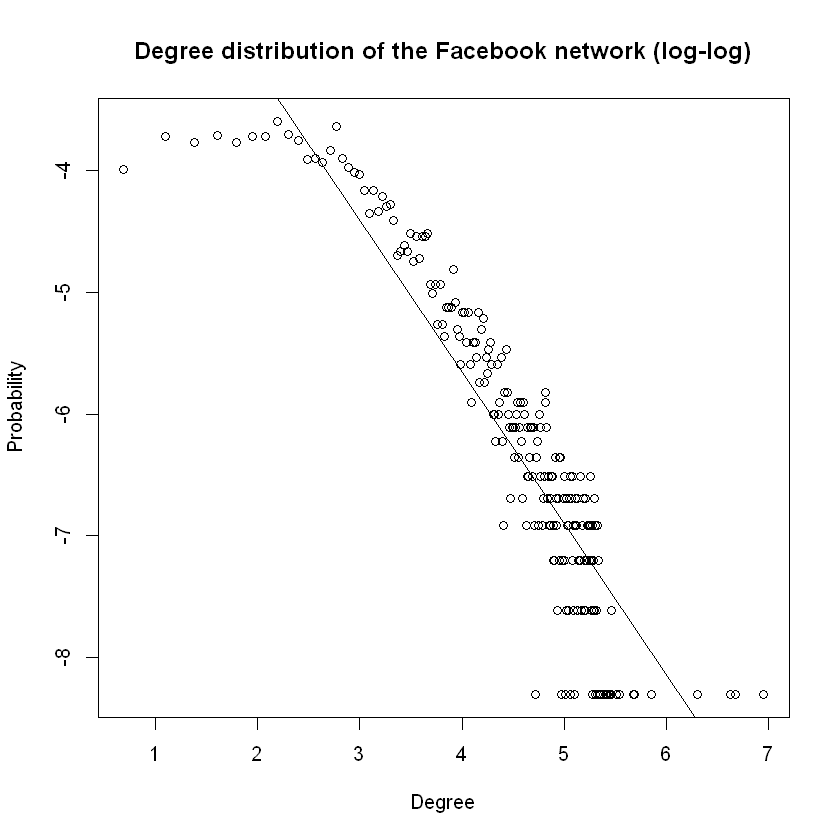

In [15]:
# Check connectivity
cat("Is the network connected: ", is.connected(facebook_net))

# Diameter
cat("\nDiameter: ", diameter(network))

# Plot degree distribution
plot(degree.distribution(facebook_net), 
     main="Degree distribution of the Facebook network", 
     xlab="Degree", ylab="Probability")
hist(degree(facebook_net), breaks=seq(0, max(degree(facebook_net)) + 1), 
     freq=FALSE, main ="Histogram of degree distribution", 
     xlab="Degree", ylab="Probability")

# Log-log plot
log_degree = log(seq(0:max(degree(facebook_net))))
log_distribution = log(degree.distribution(facebook_net))

# Remove -inf
valid_idx = !is.infinite(log_degree) & !is.infinite(log_distribution)
log_degree = log_degree[valid_idx]
log_distribution = log_distribution[valid_idx]
cat("\nSlope: ", cov(log_degree, log_distribution) / var(log_degree))

# Fit a linear model
mod = lm(log_distribution ~ log_degree)
plot(log_degree, log_distribution, 
     main="Degree distribution of the Facebook network (log-log)", 
     xlab="Degree", ylab="Probability")
abline(mod)
print(mod)

#### 1.2

In [46]:
target_node_network = find_personalized_network(graph=facebook_net, target_node=1)



Personalized network of Node 1 :
Number of nodes: 348
Number of edges: 2866
Diameter:  2

#### 1.3

In [25]:
# Degrees of core nodes
core_nodes_degrees = c()
for (i in degree(facebook_net))
{
    if (i > 200)
    {
        core_nodes_degrees = c(core_nodes_degrees, i)
    }
}
cat("The number of core nodes: ", length(core_nodes_degrees))
cat("\nAverage degree: ", mean(core_nodes_degrees))

The number of core nodes:  40
Average degree:  279.375

#### 1.3.1

In [6]:
target_nodes = c(1, 108, 349, 484, 1087)
target_node_networks = list()
for (target_node in target_nodes)
{
    target_node_networks[[length(target_node_networks) + 1]] = find_personalized_network(graph=facebook_net, target_node=target_node)
}



Personalized network of Node 1 :
Number of nodes: 348
Number of edges: 2866
Diameter:  2

Personalized network of Node 108 :
Number of nodes: 1046
Number of edges: 27795
Diameter:  2

Personalized network of Node 349 :
Number of nodes: 230
Number of edges: 3441
Diameter:  2

Personalized network of Node 484 :
Number of nodes: 232
Number of edges: 4525
Diameter:  2

Personalized network of Node 1087 :
Number of nodes: 206
Number of edges: 7409
Diameter:  2


Modularity of core node 1 (Fast-Greedy): 0.4131014
Modularity of core node 1 (Edge-Betweenness): 0.3533022
Modularity of core node 1 (Infomap): 0.3891185

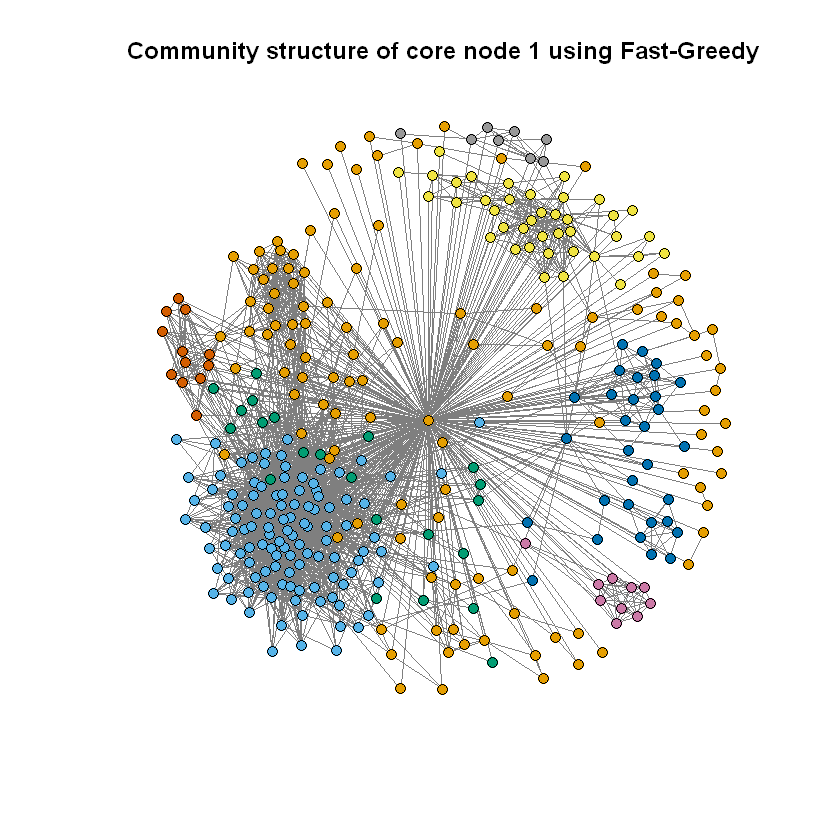

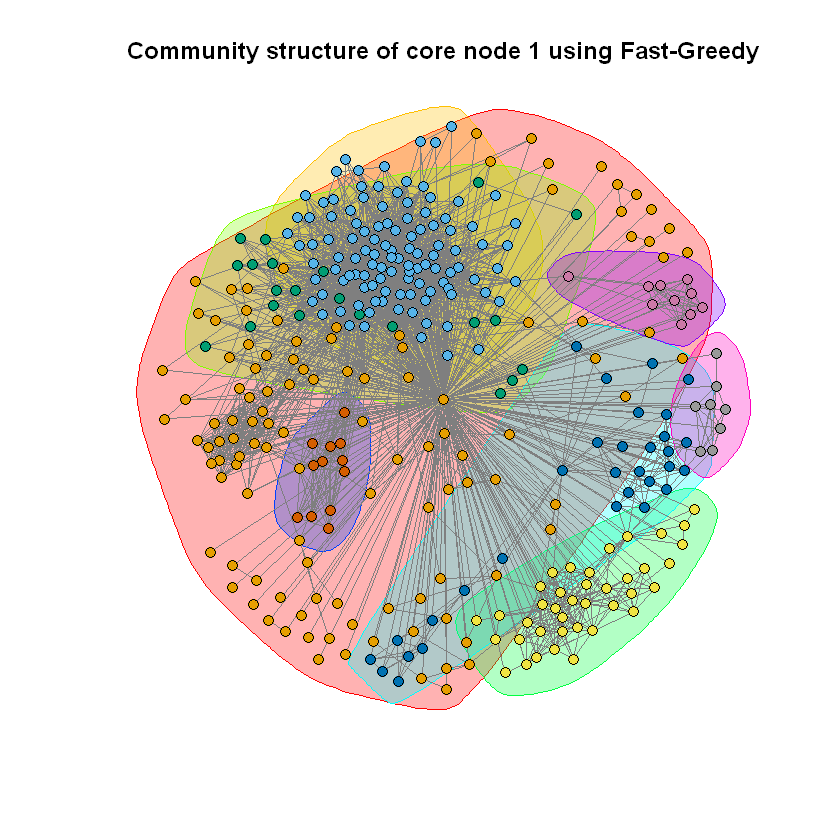

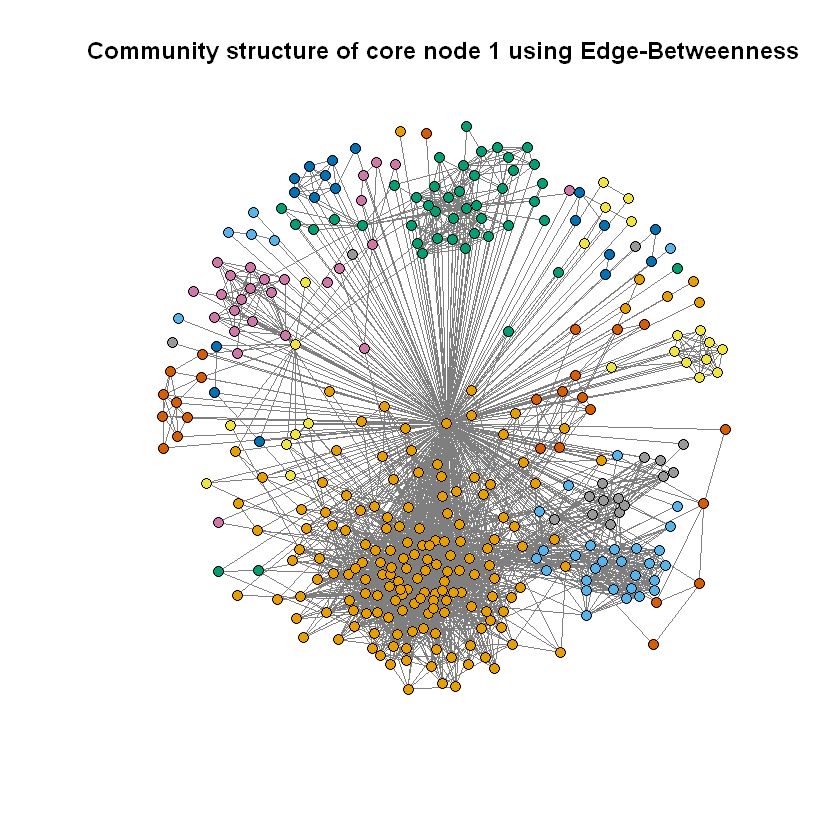

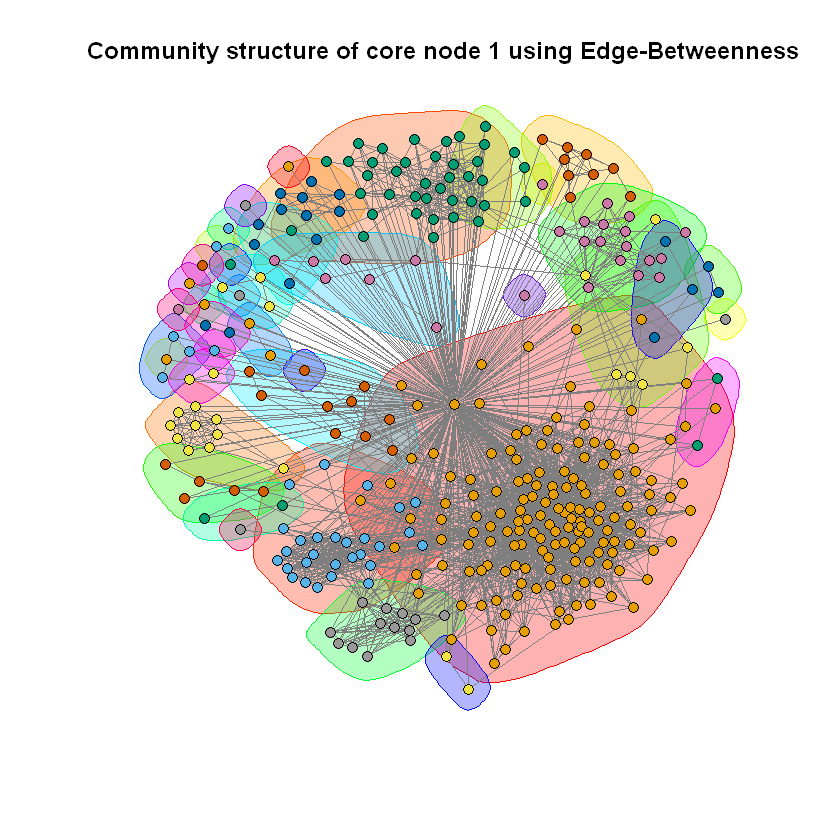

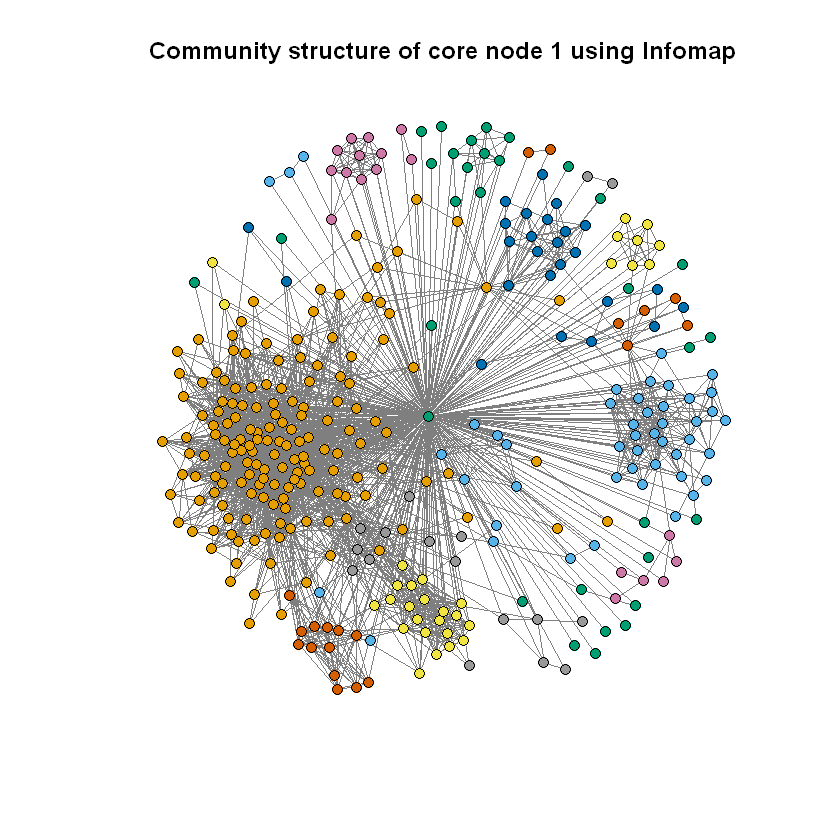


Modularity of core node 108 (Fast-Greedy): 0.4359294
Modularity of core node 108 (Edge-Betweenness): 0.5067549
Modularity of core node 108 (Infomap): 0.5082492

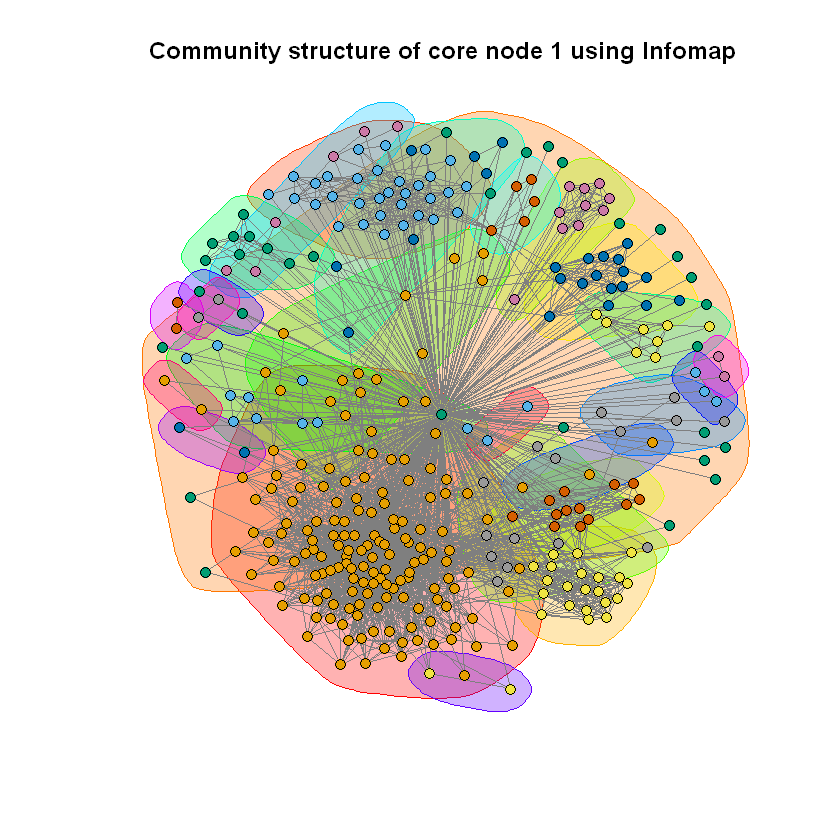

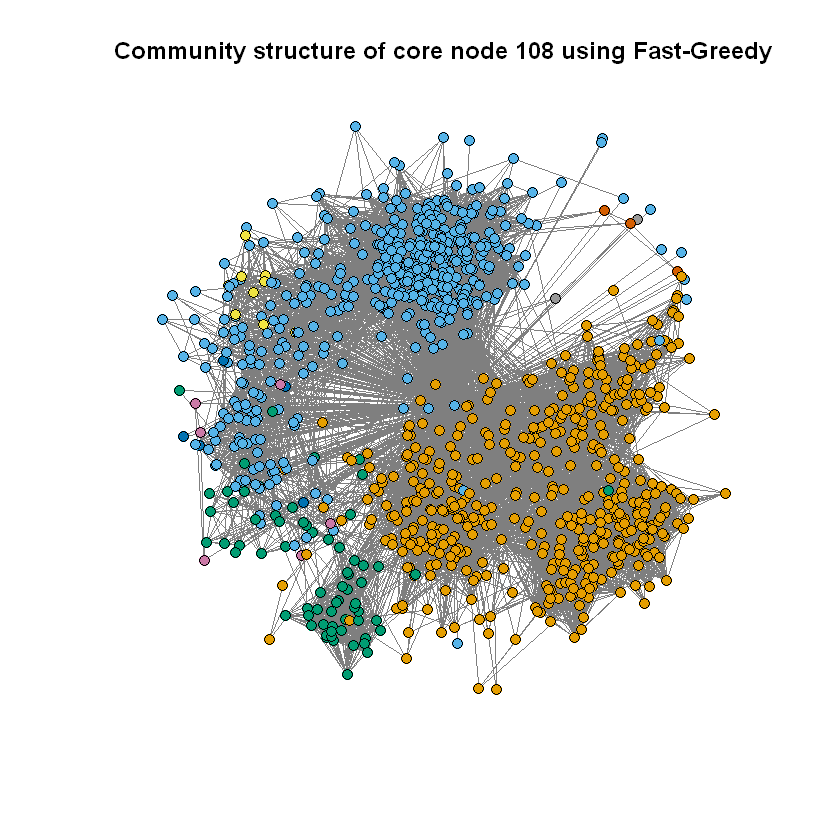

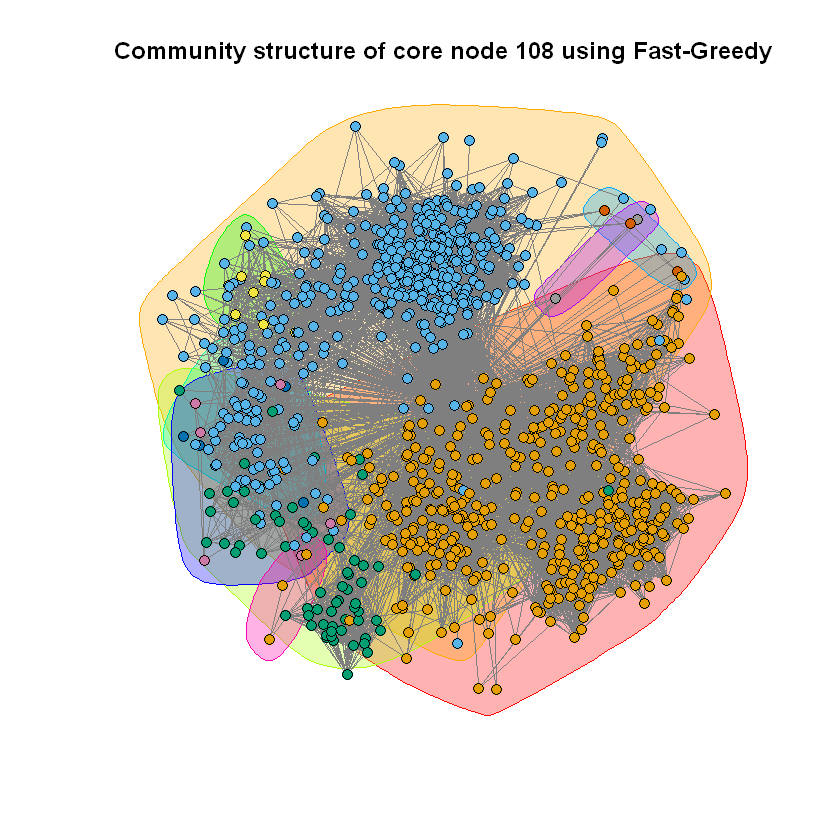

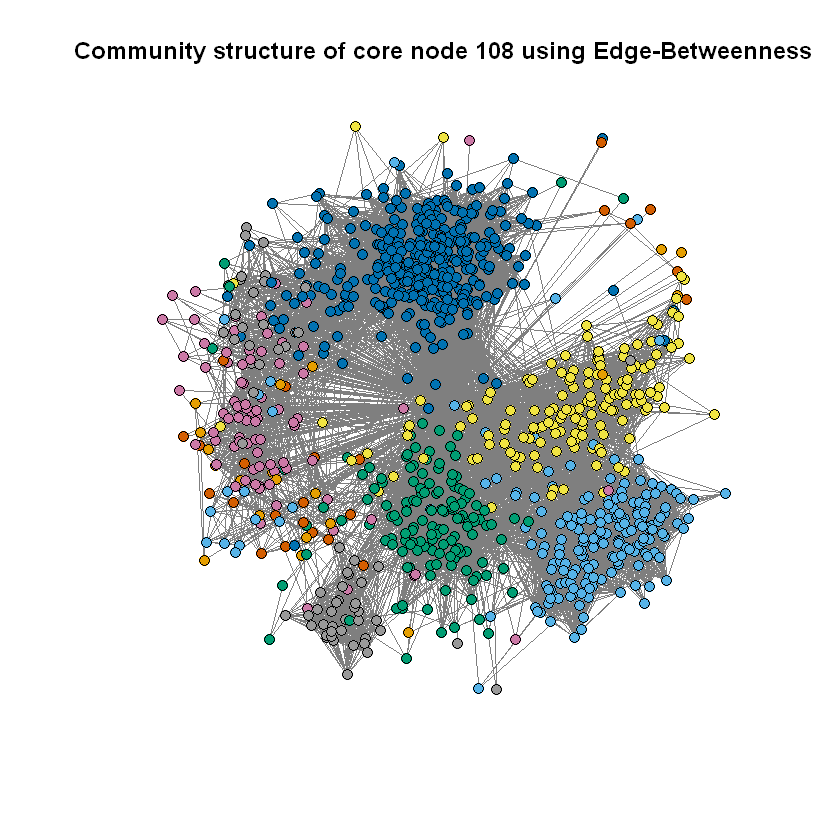

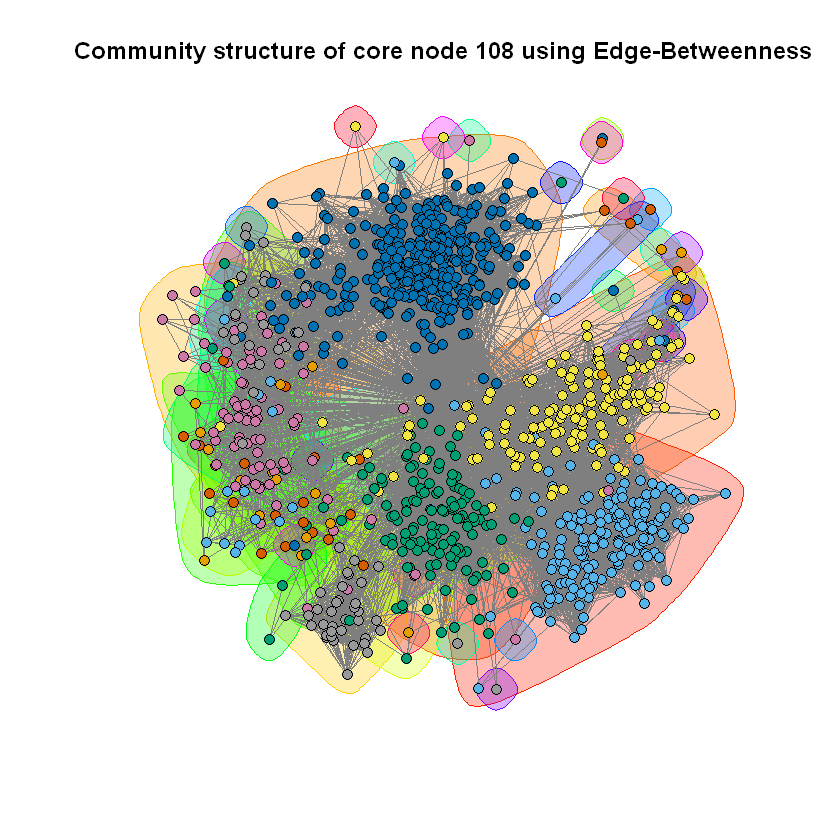

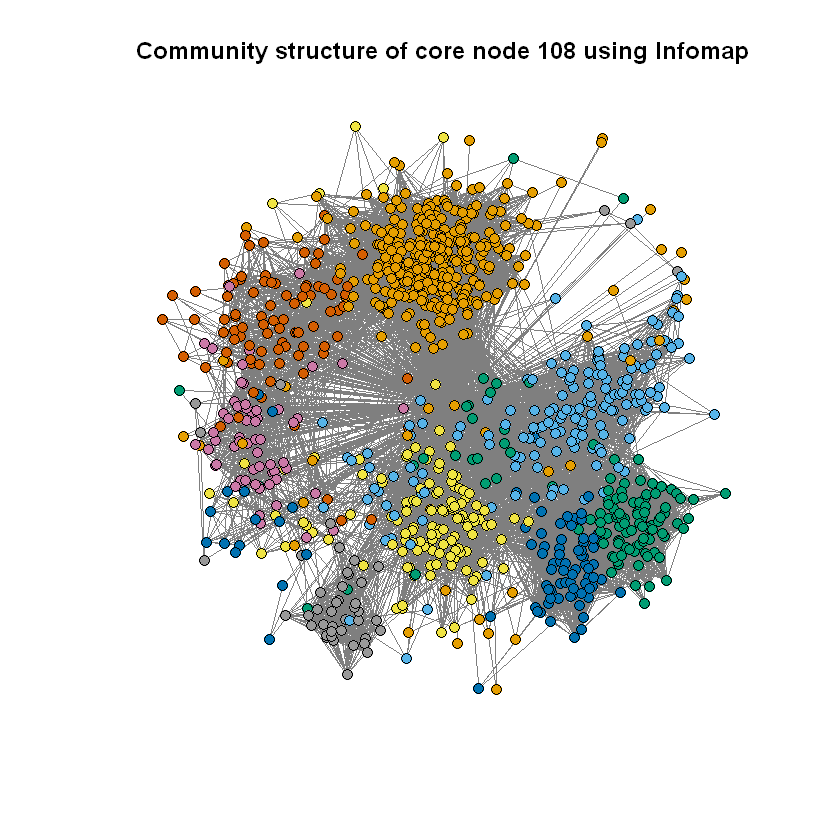


Modularity of core node 349 (Fast-Greedy): 0.2517149
Modularity of core node 349 (Edge-Betweenness): 0.133528
Modularity of core node 349 (Infomap): 0.203753

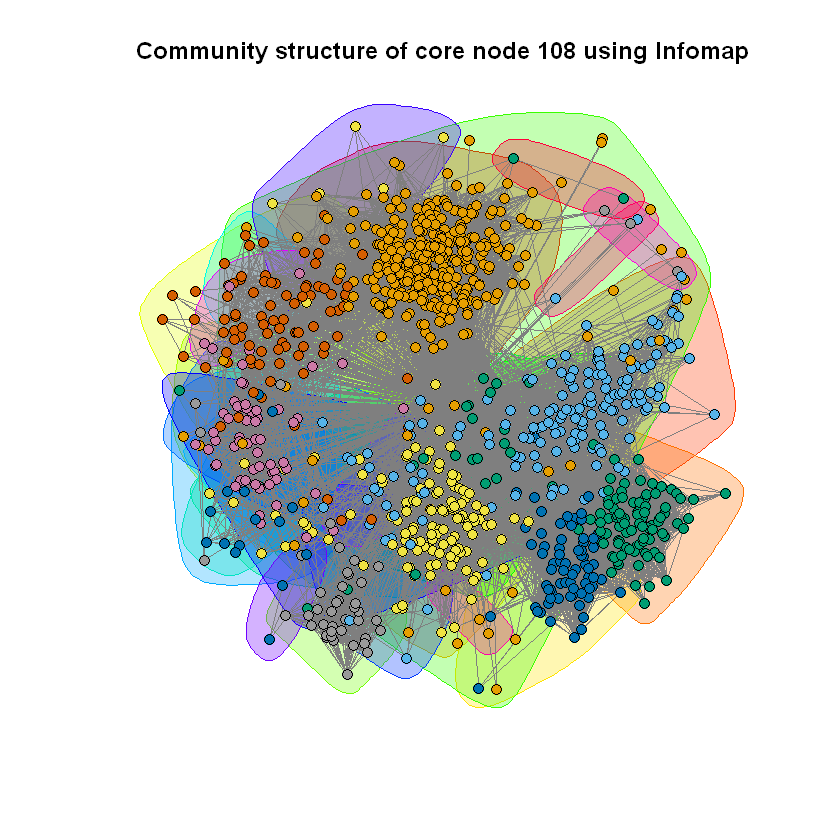

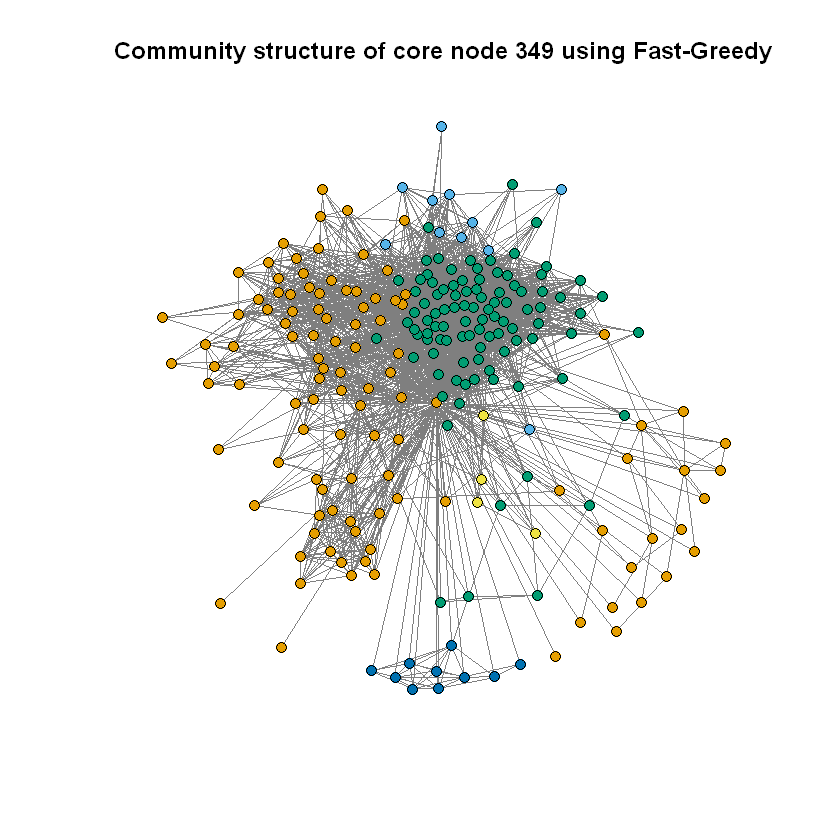

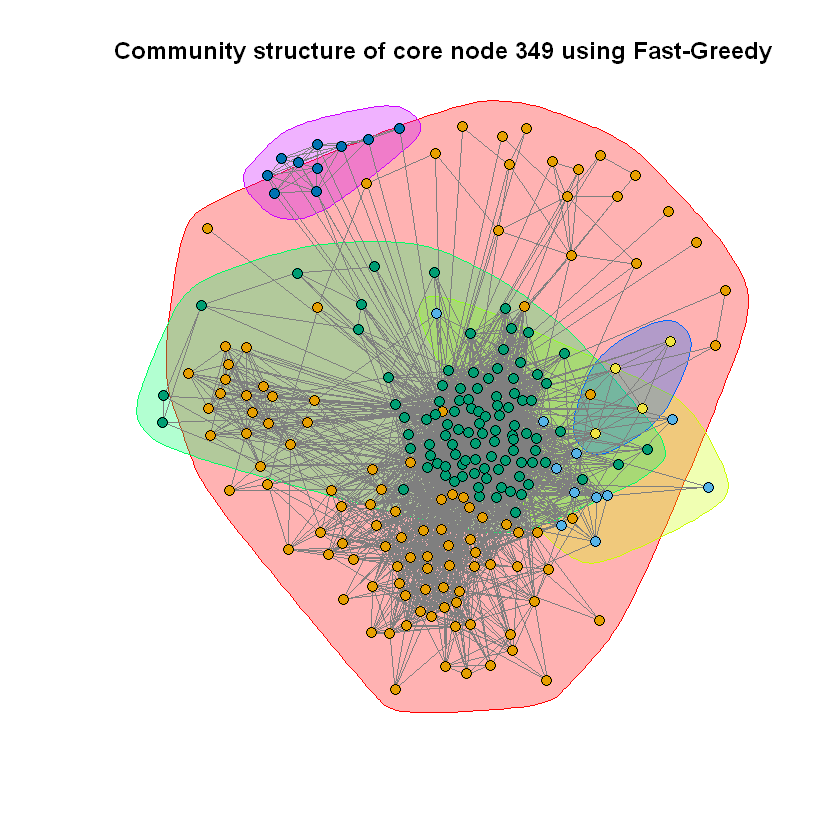

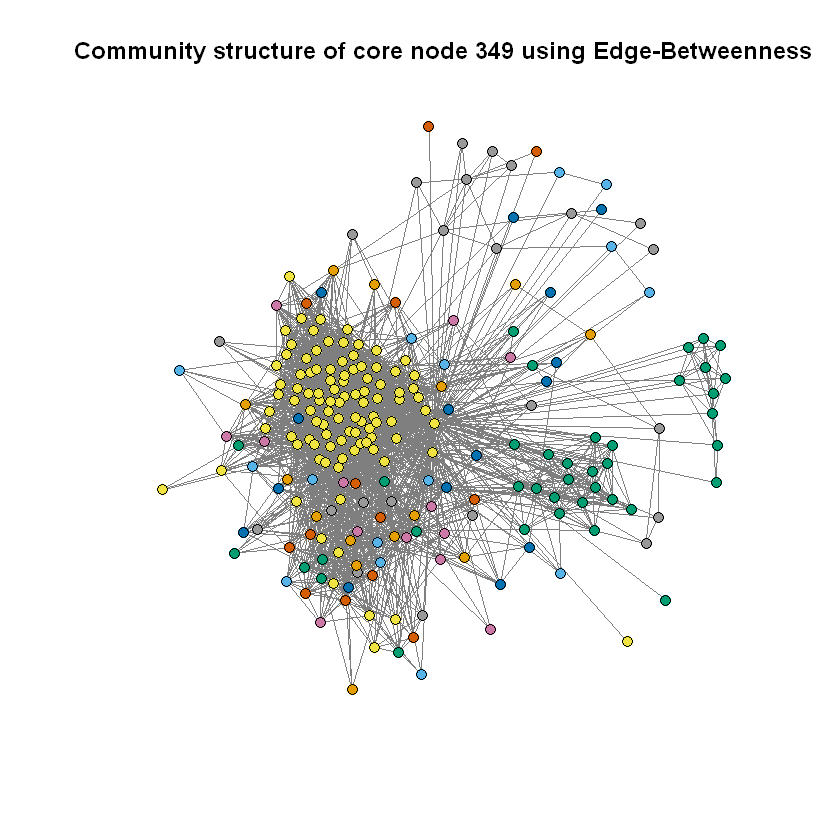

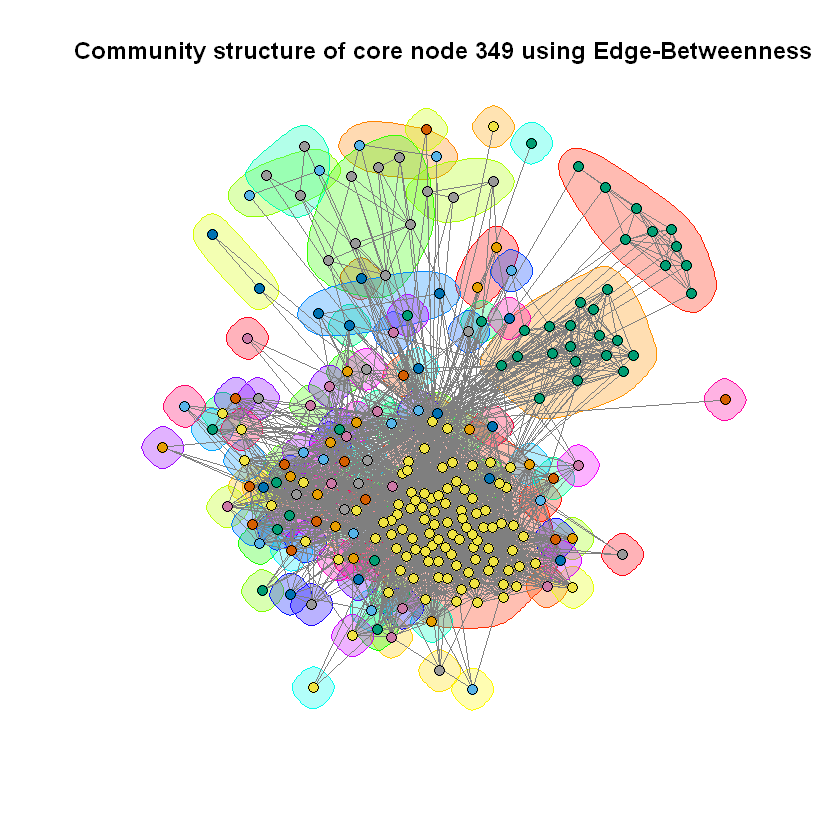

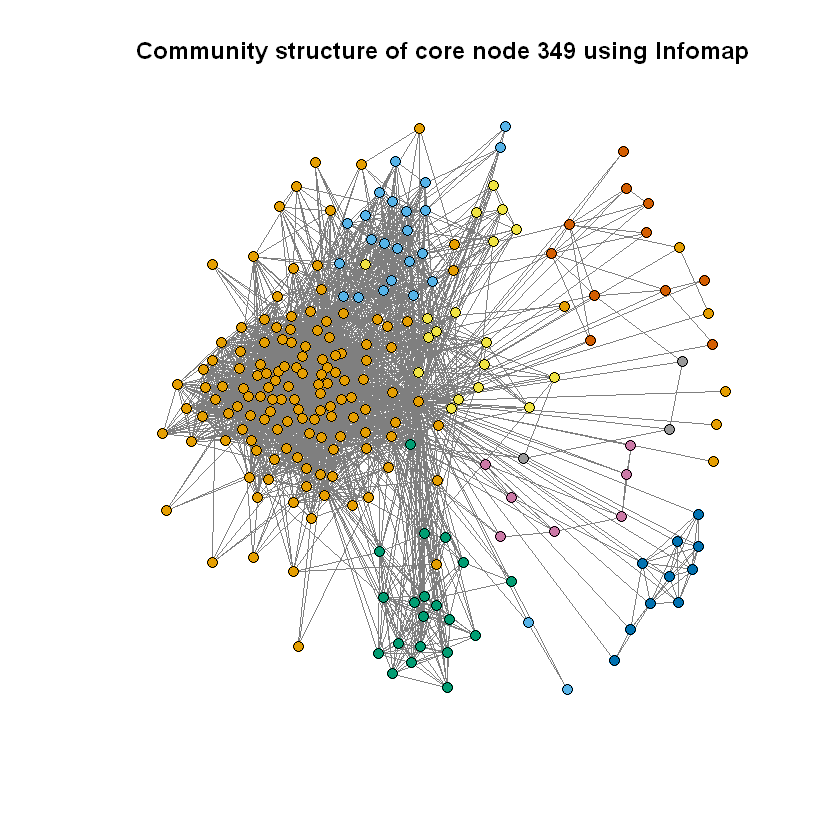


Modularity of core node 484 (Fast-Greedy): 0.5070016
Modularity of core node 484 (Edge-Betweenness): 0.4890952
Modularity of core node 484 (Infomap): 0.5152788

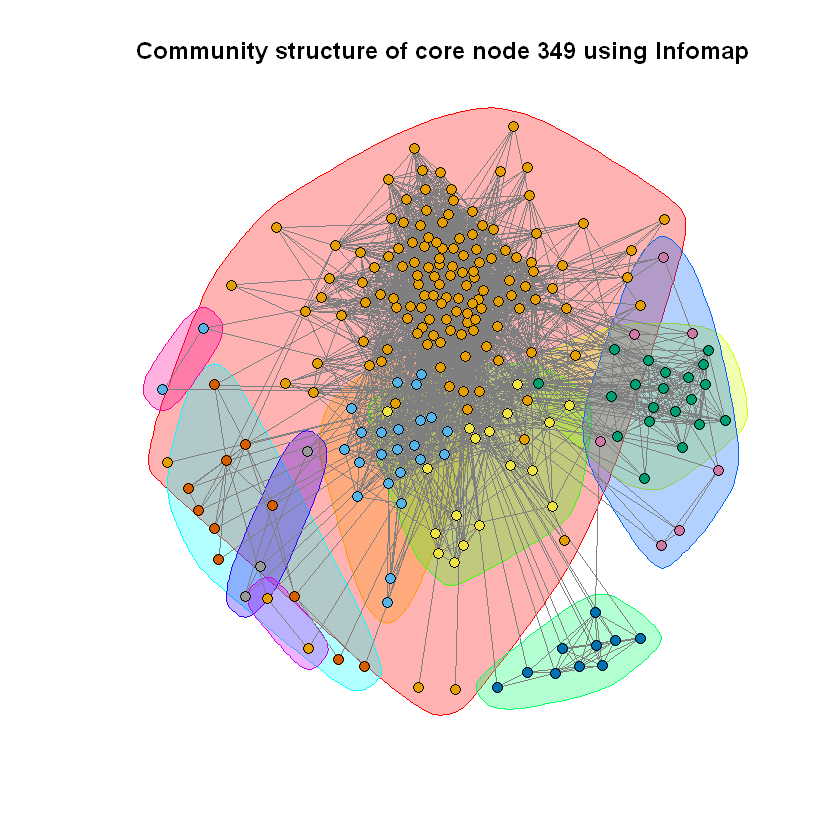

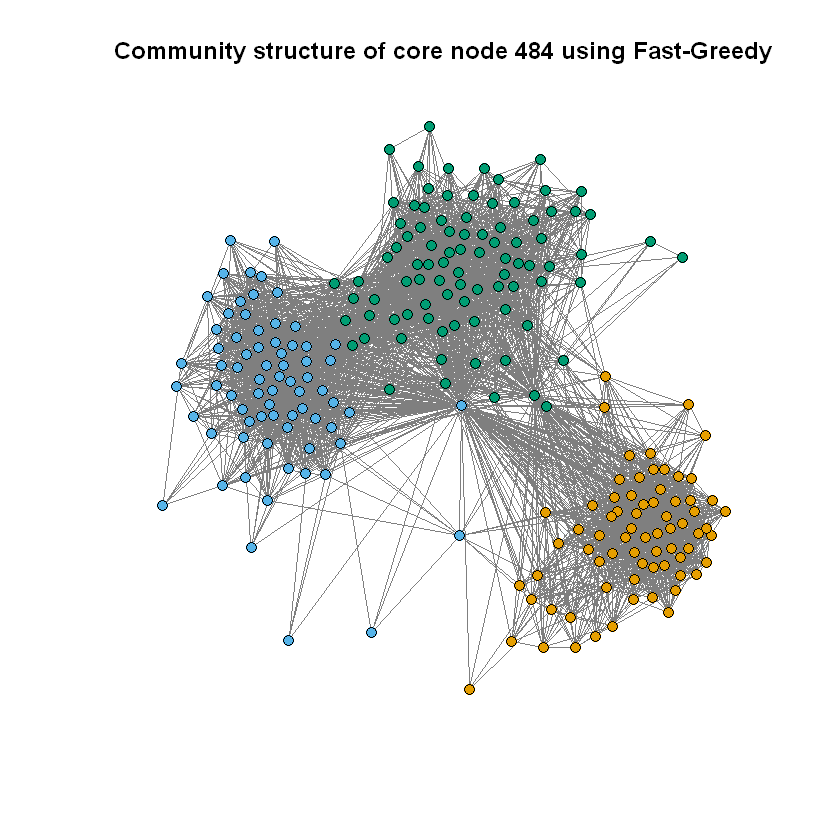

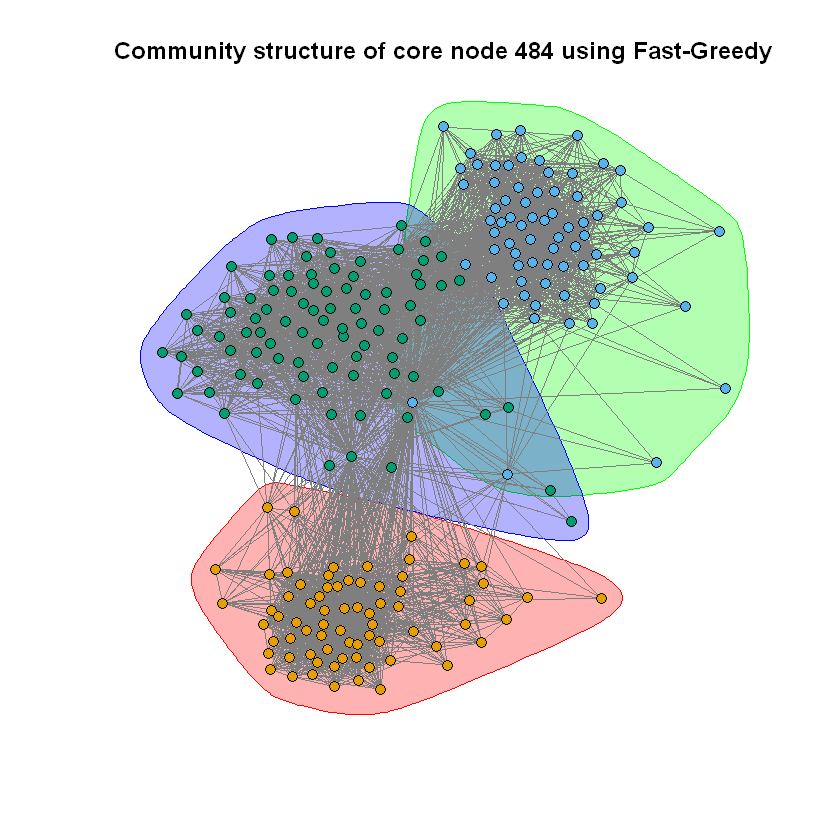

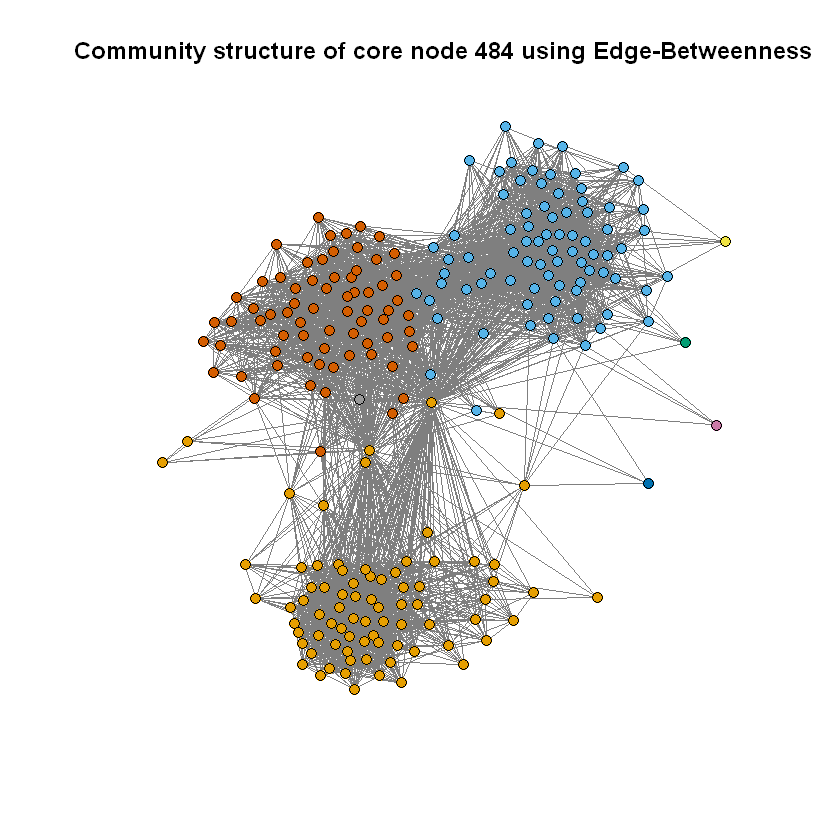

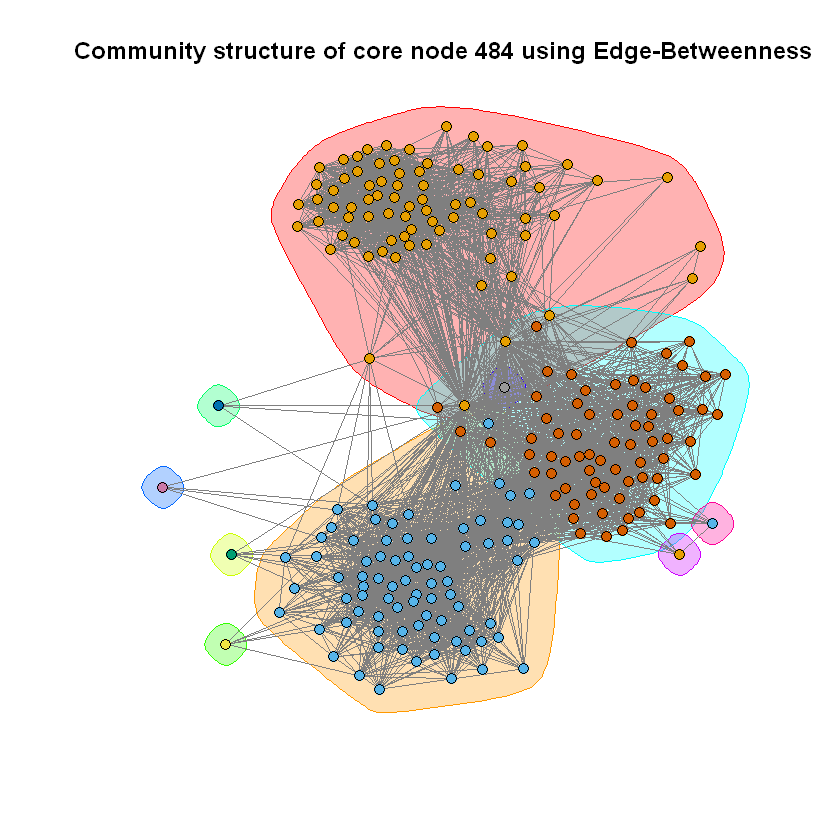

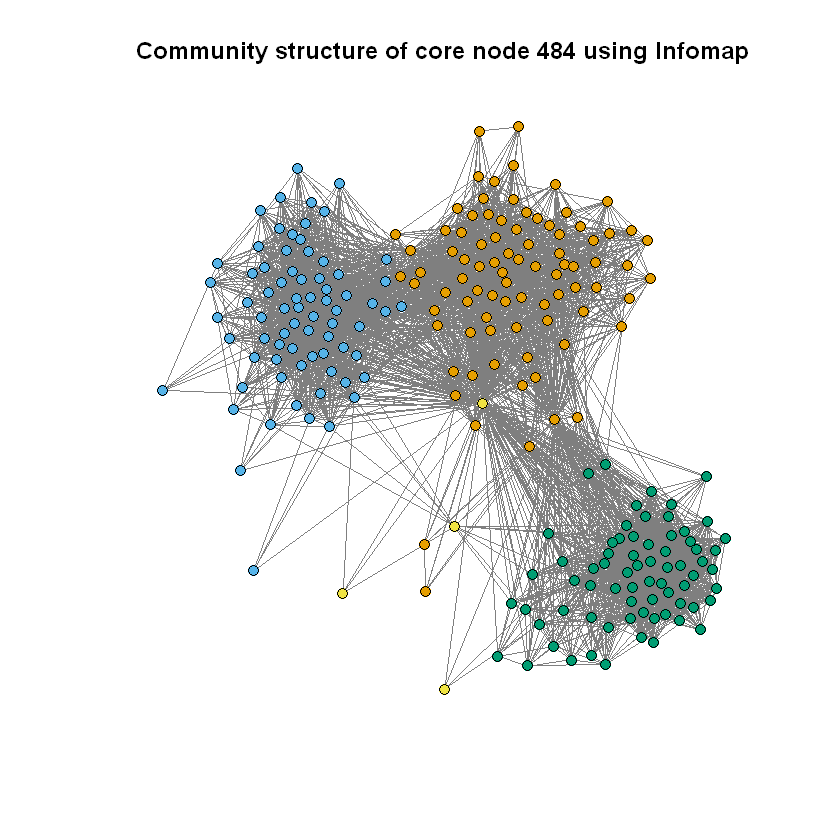


Modularity of core node 1087 (Fast-Greedy): 0.1455315
Modularity of core node 1087 (Edge-Betweenness): 0.02762377
Modularity of core node 1087 (Infomap): 0.02690662

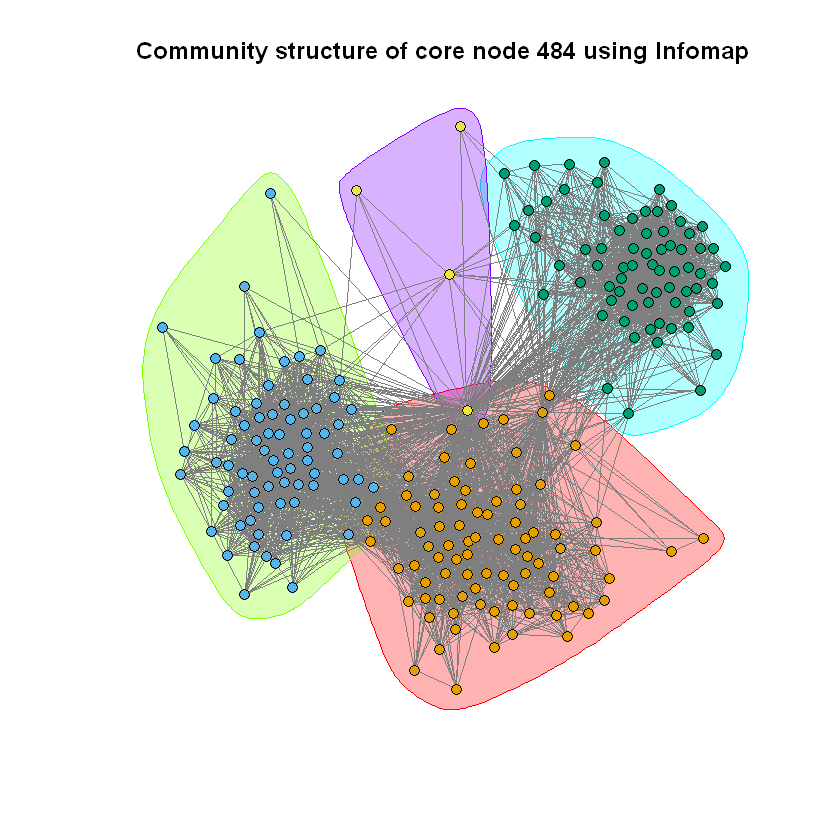

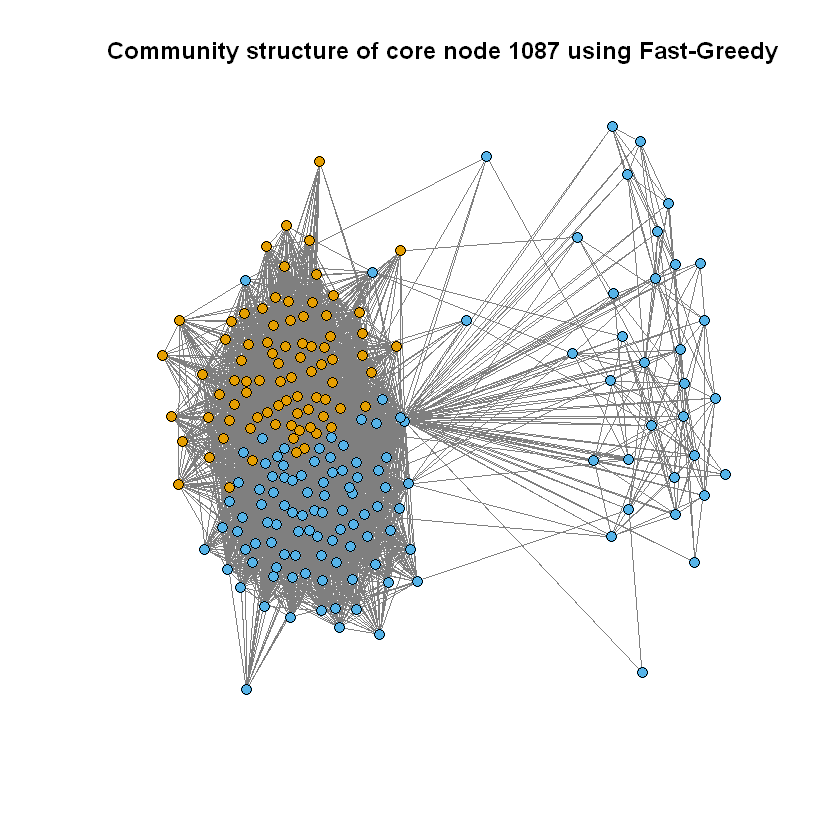

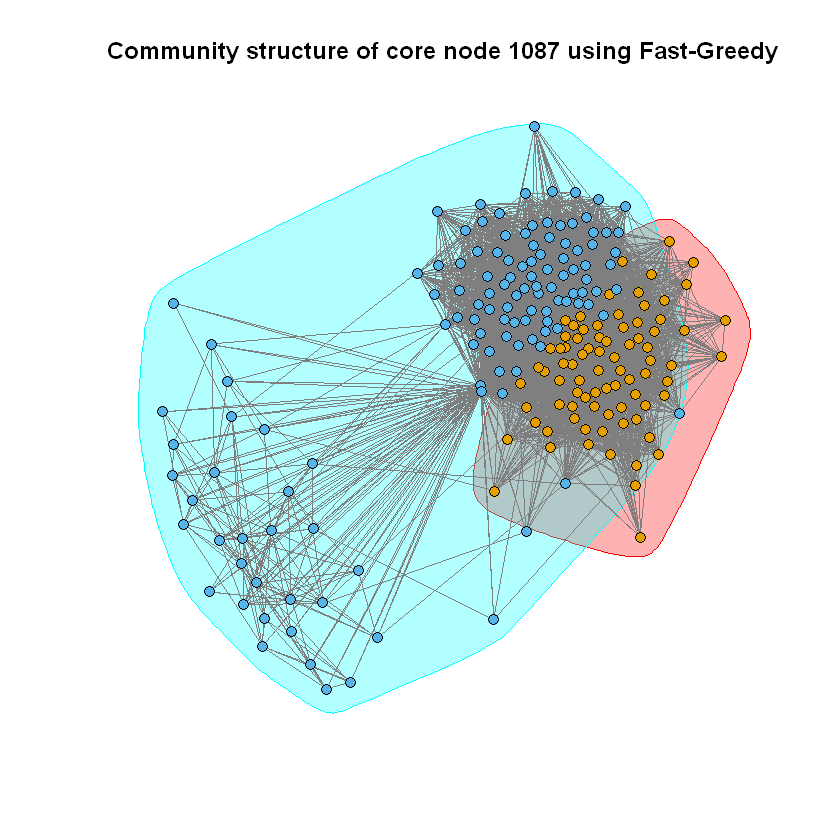

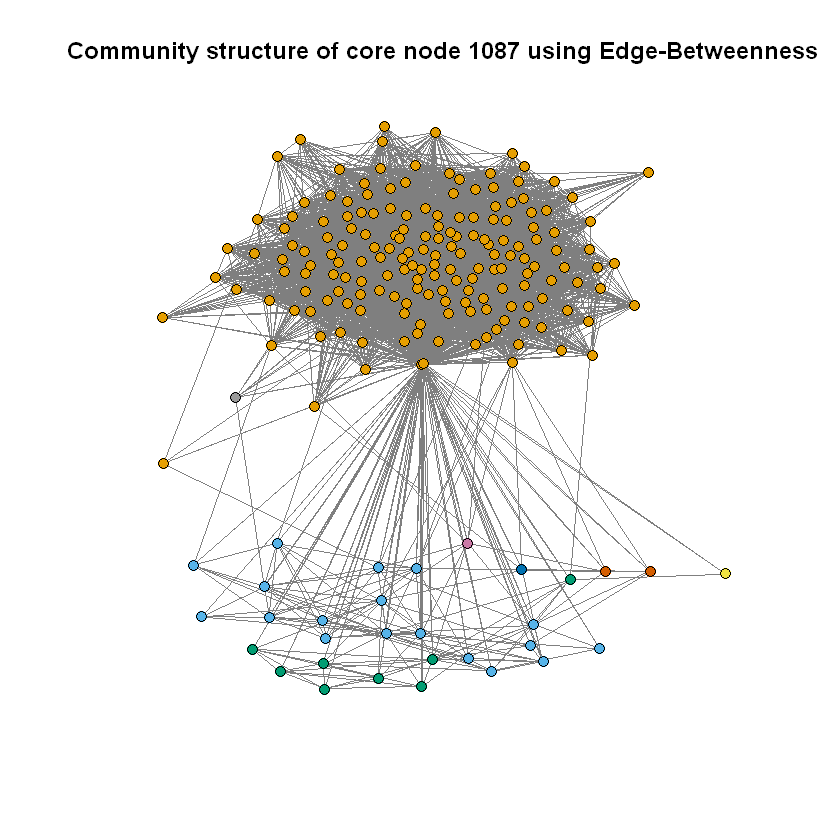

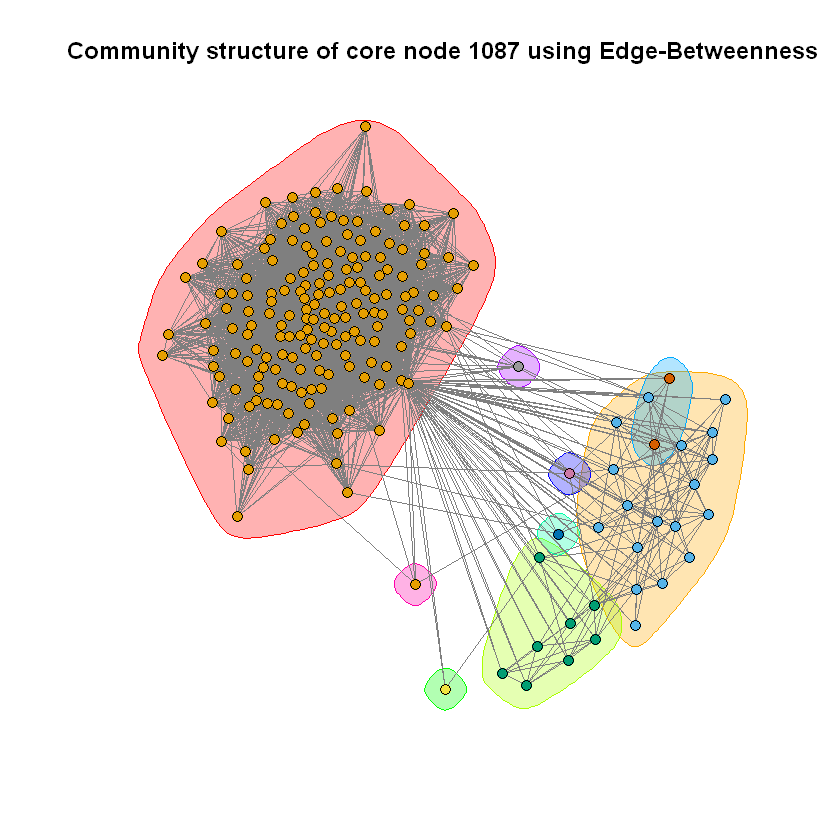

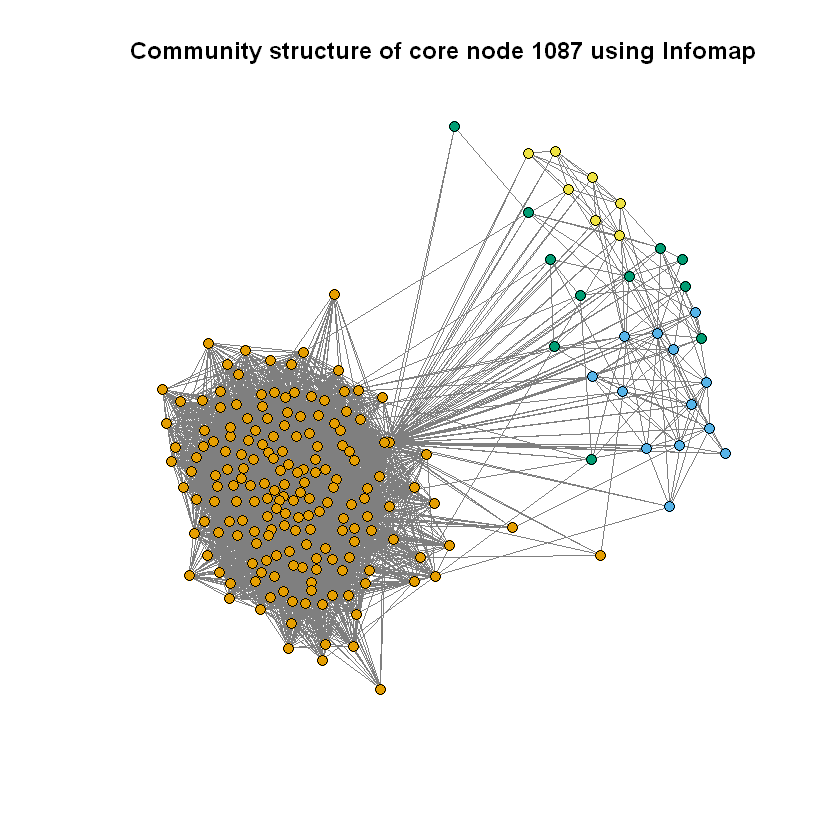

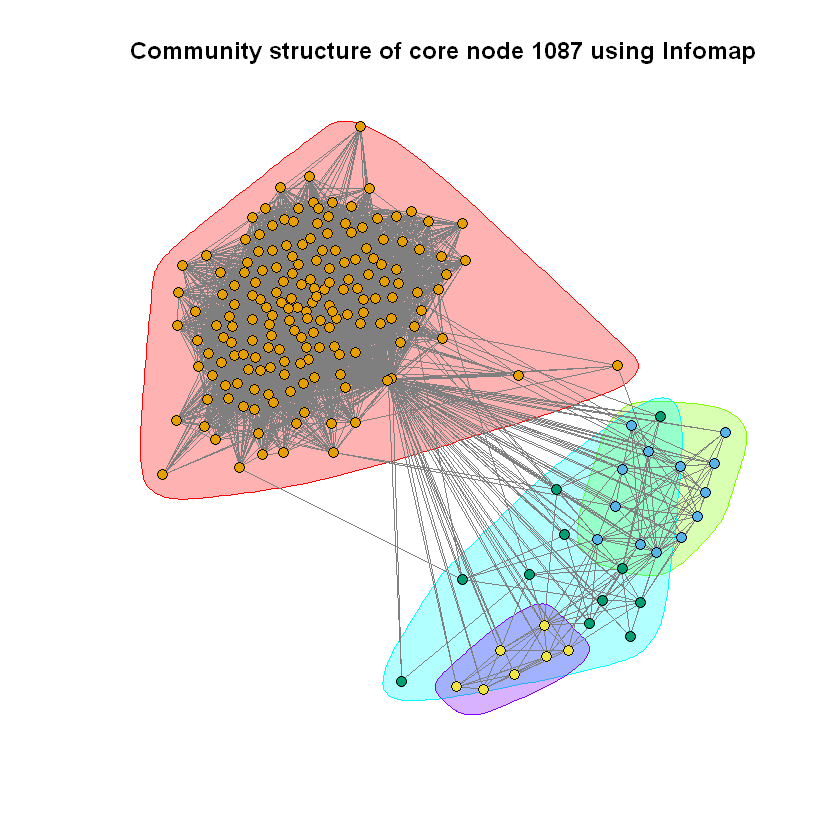

In [97]:
for (i in 1:length(target_nodes))
{
    display_communities(target_node_networks[[i]], target_nodes[i])
}

#### 1.3.2


Modularity of core node 1 (Fast-Greedy): 0.4418533
Modularity of core node 1 (Edge-Betweenness): 0.4161461
Modularity of core node 1 (Infomap): 0.4180077

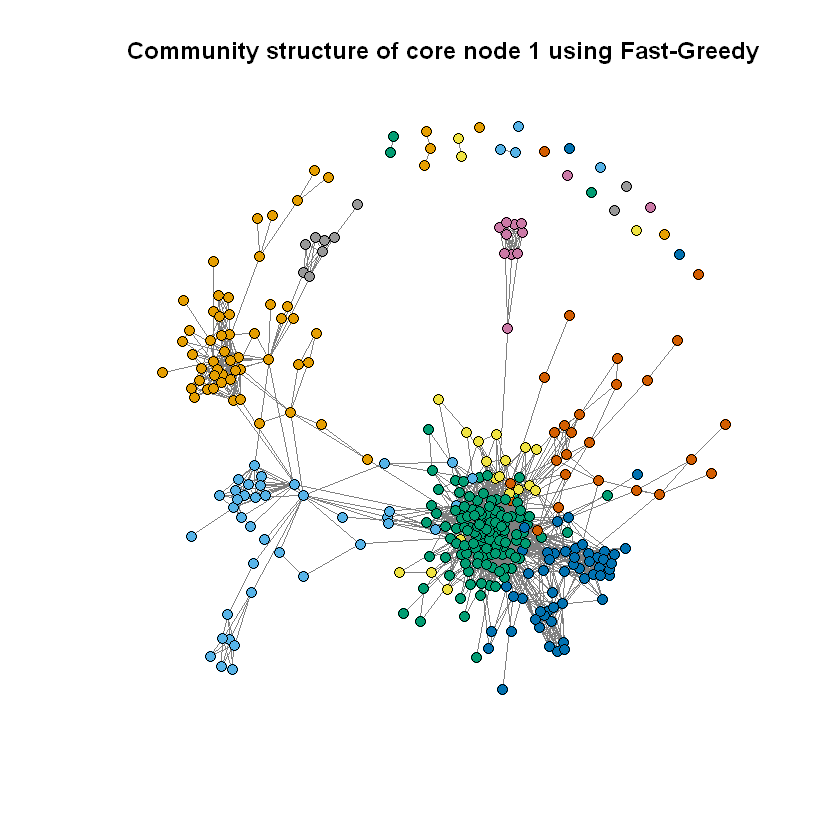

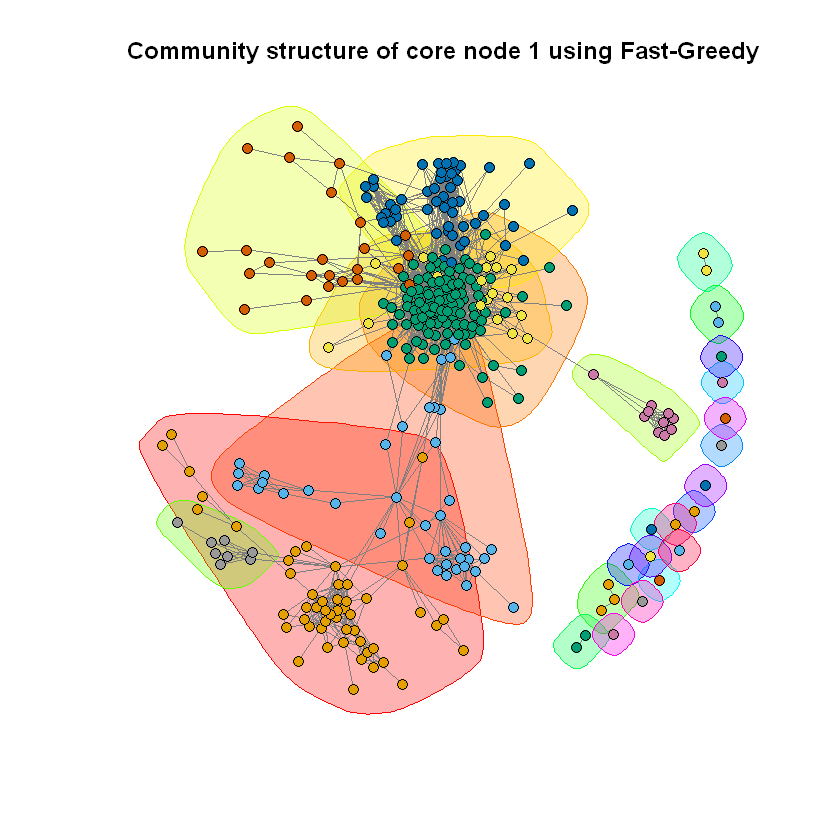

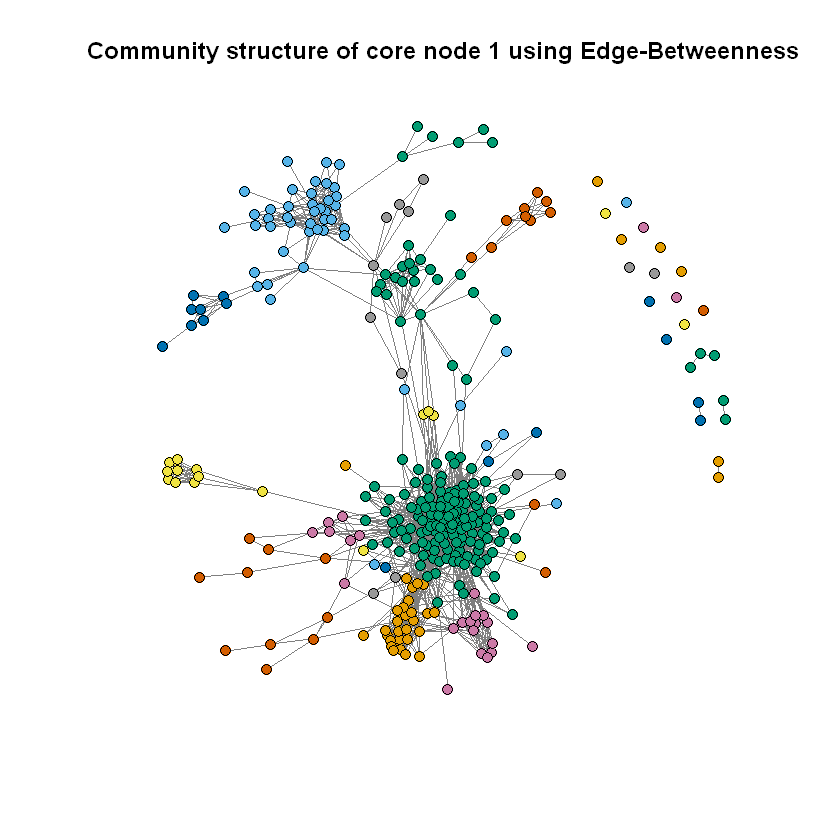

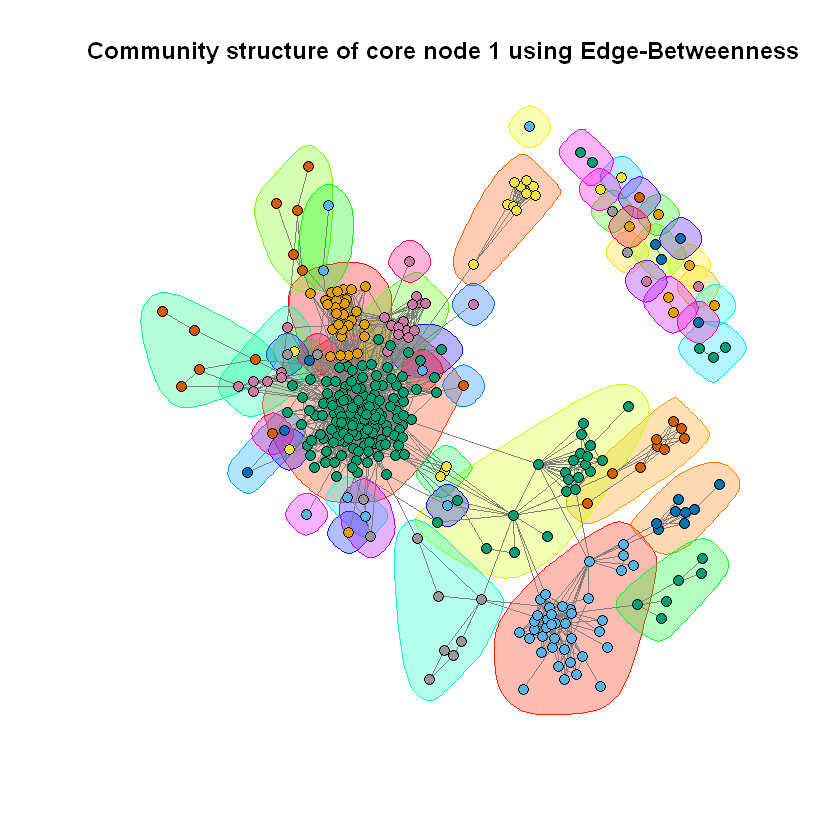

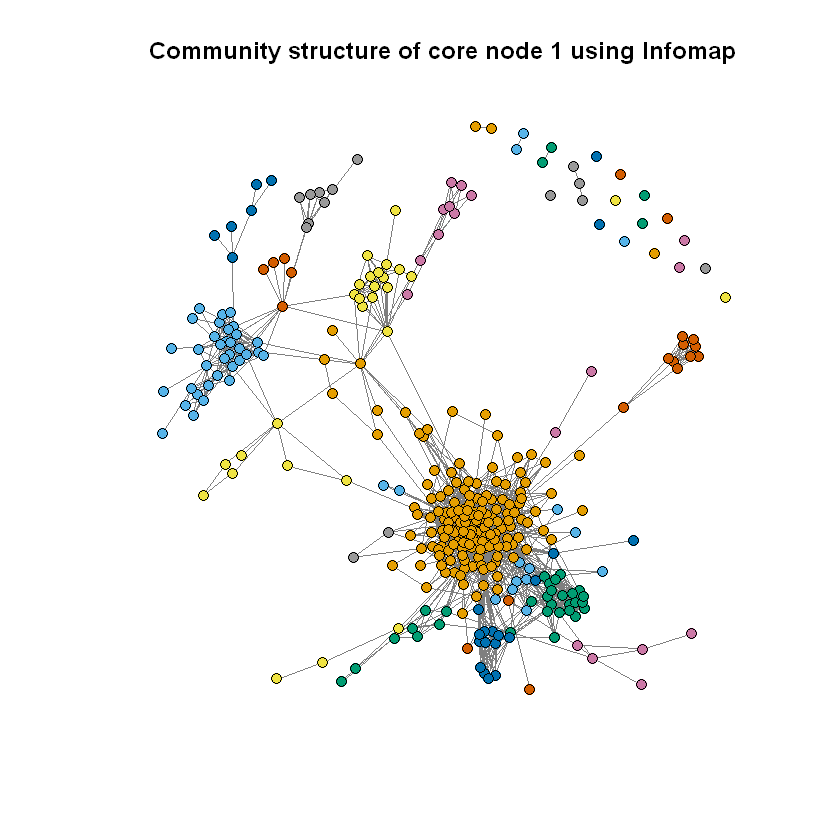


Modularity of core node 108 (Fast-Greedy): 0.4581271
Modularity of core node 108 (Edge-Betweenness): 0.5213216
Modularity of core node 108 (Infomap): 0.5205171

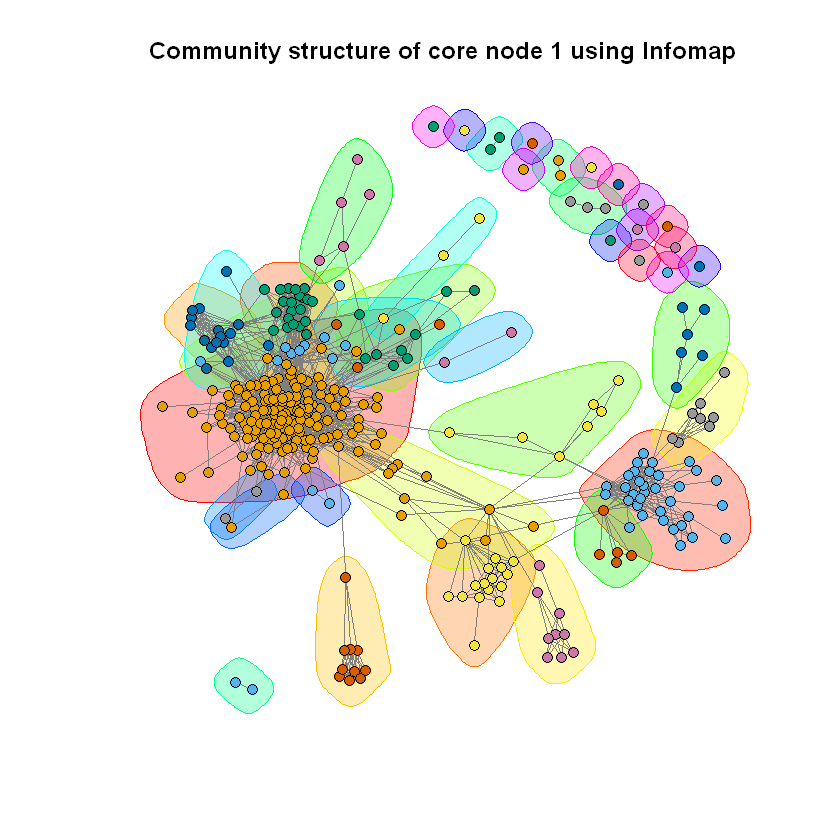

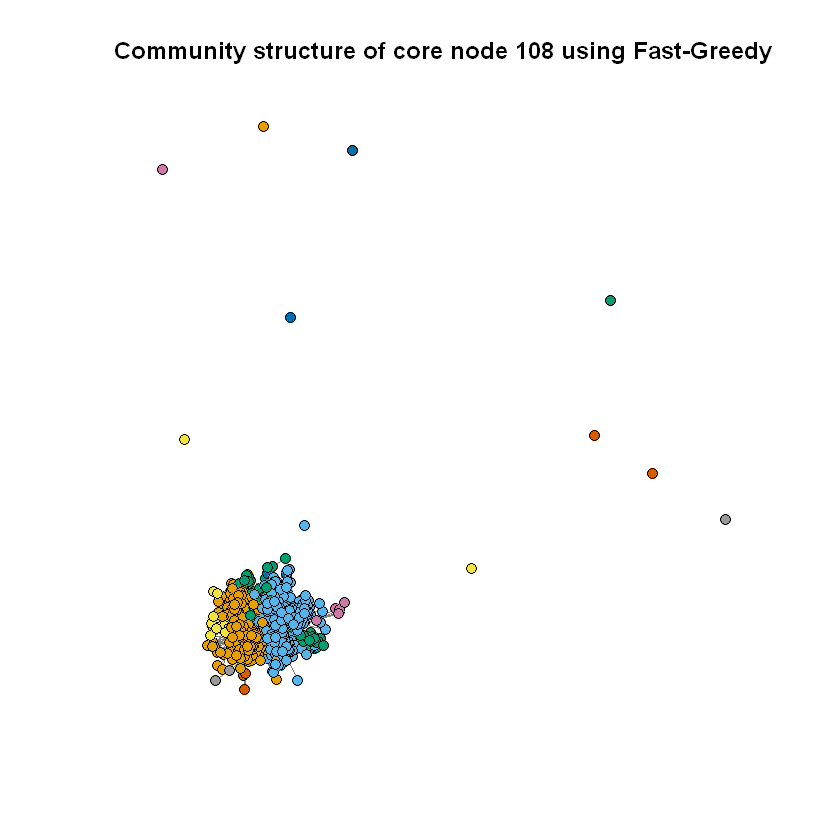

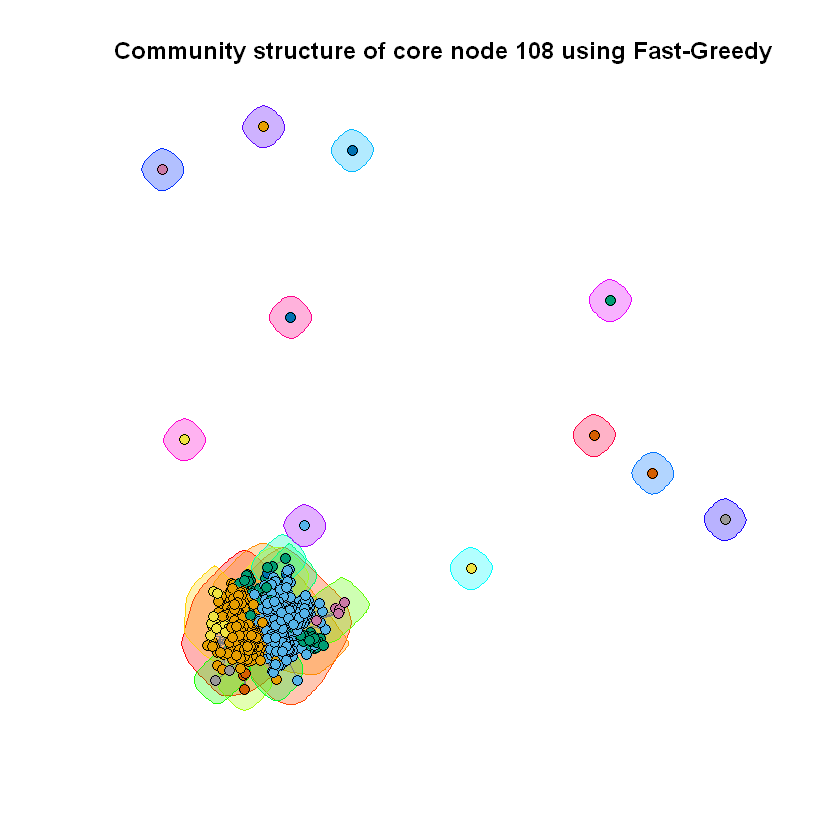

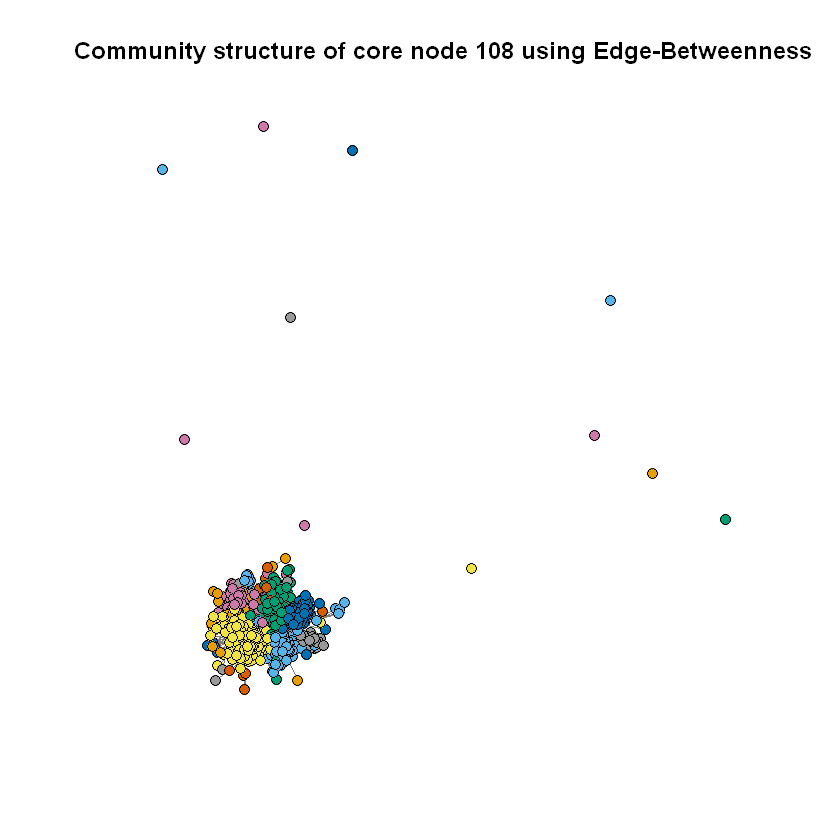

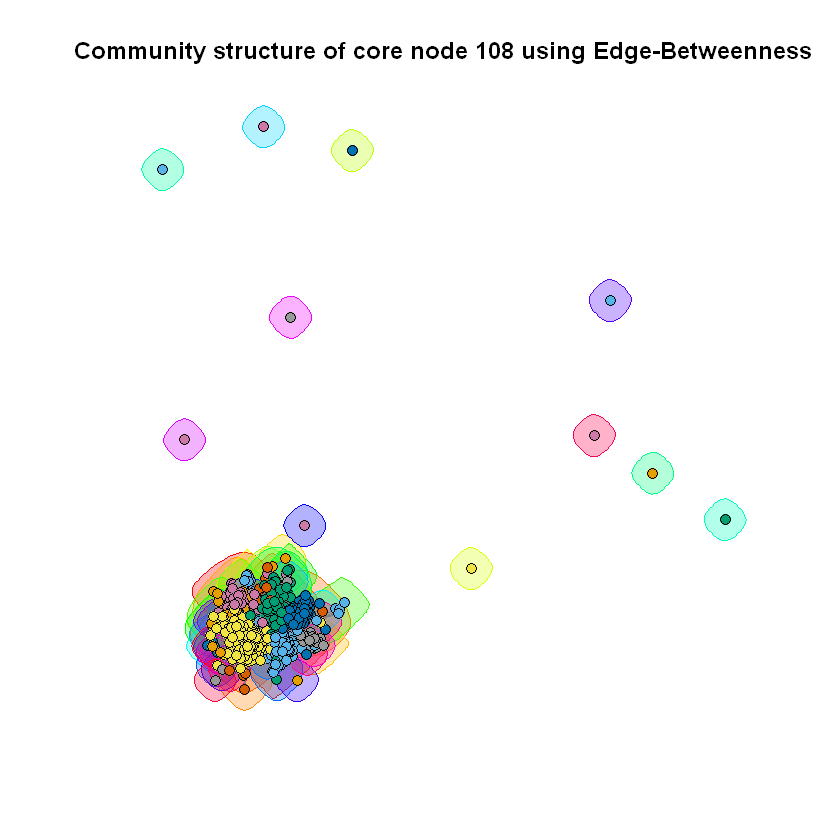

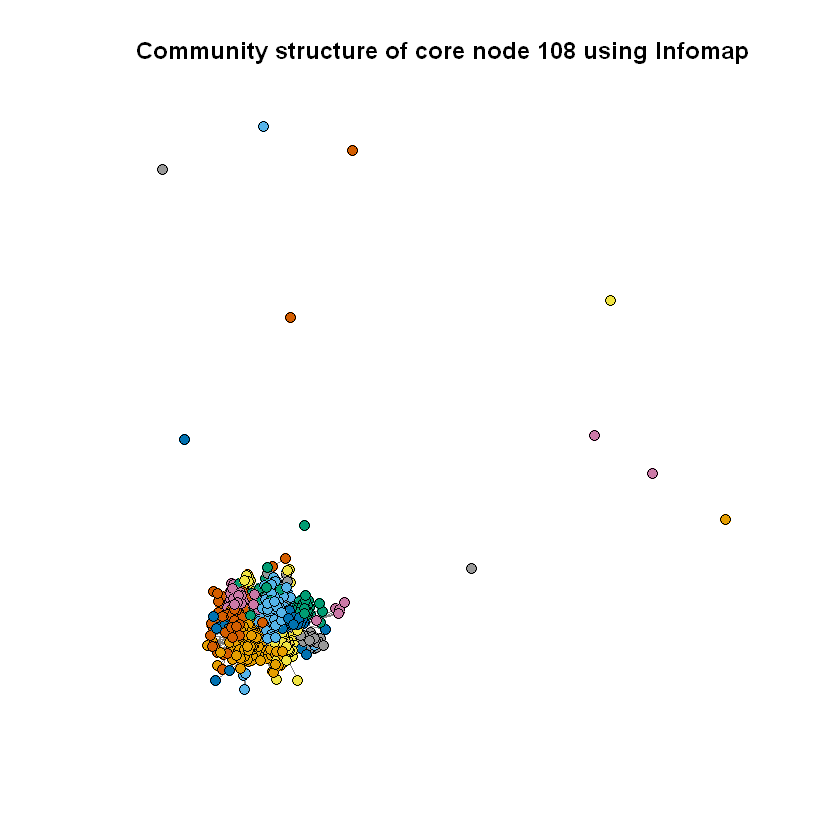


Modularity of core node 349 (Fast-Greedy): 0.2456918
Modularity of core node 349 (Edge-Betweenness): 0.1505663
Modularity of core node 349 (Infomap): 0.2337732

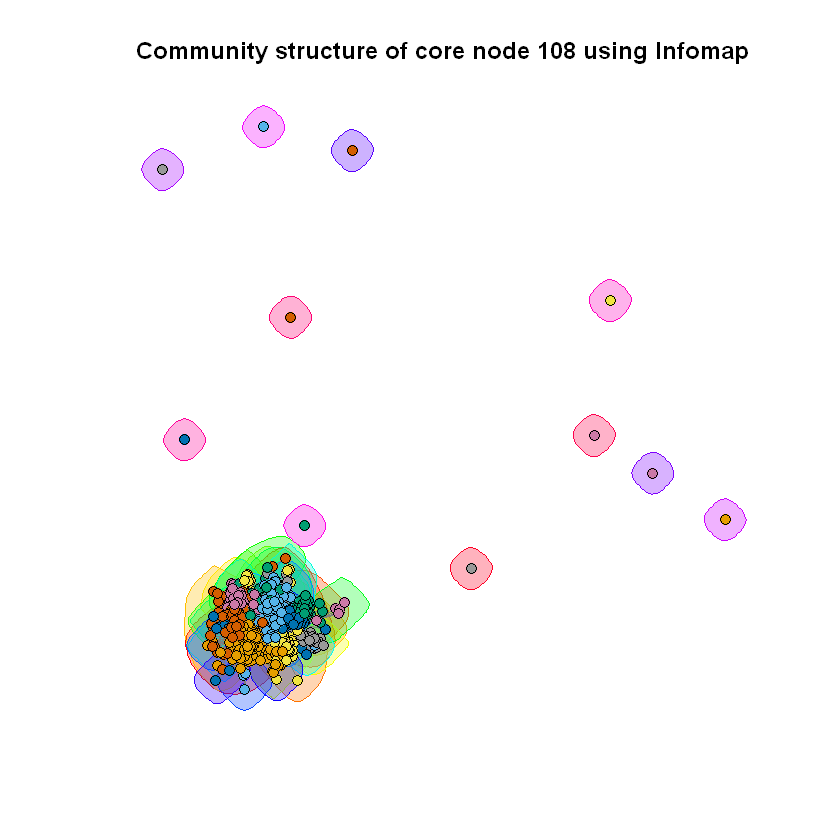

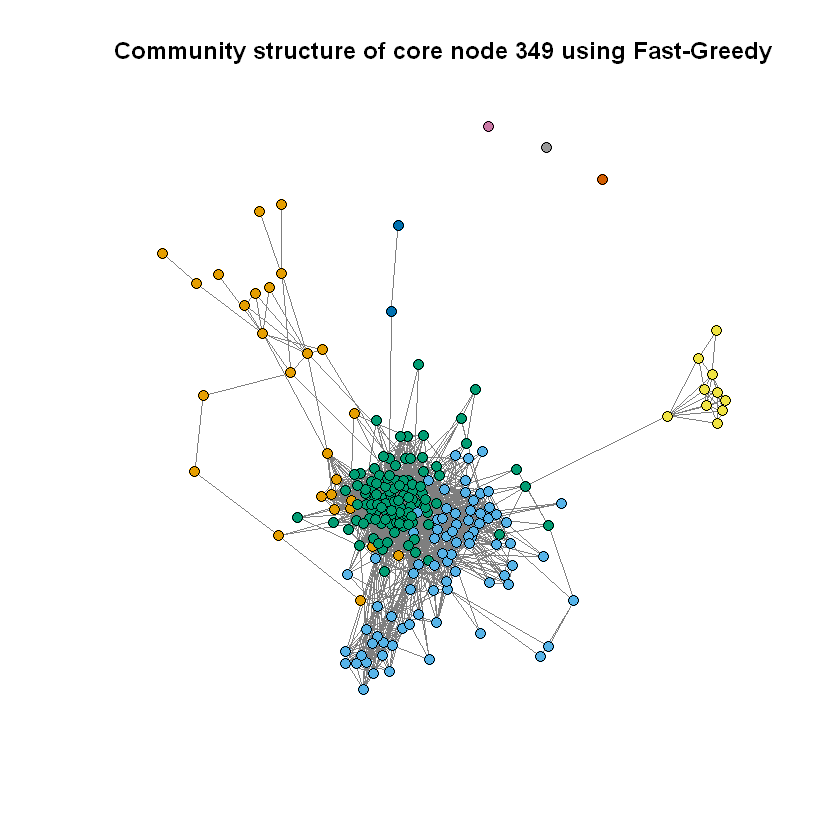

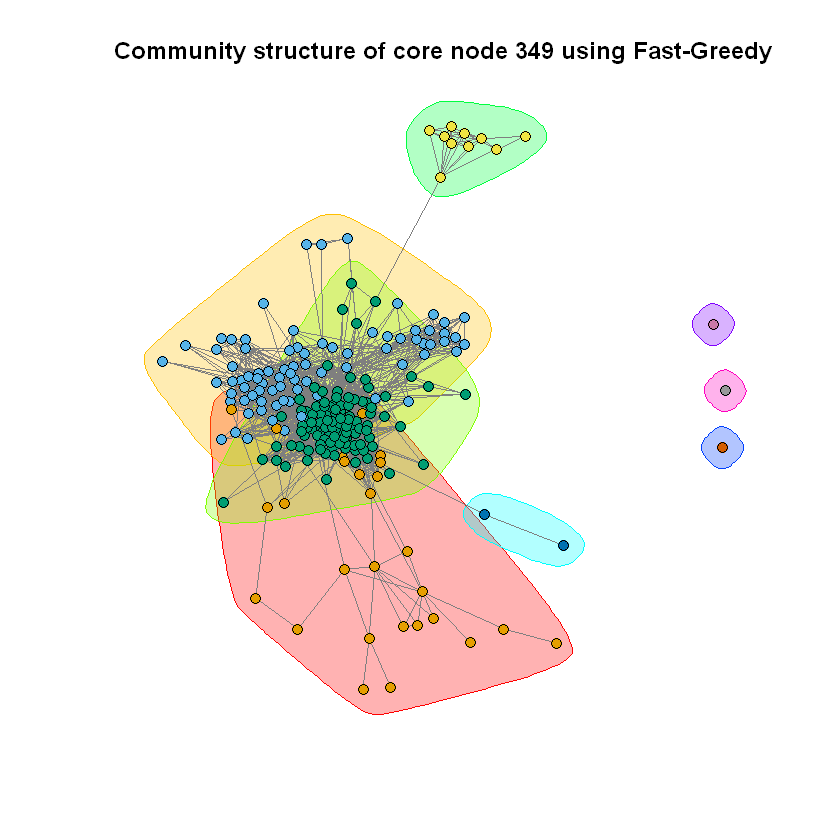

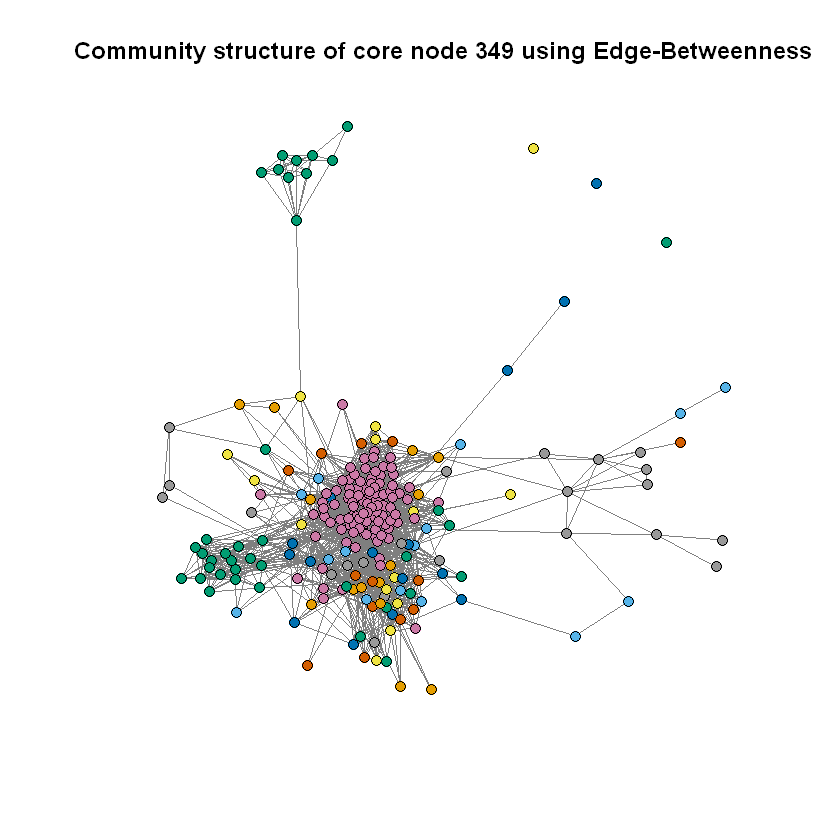

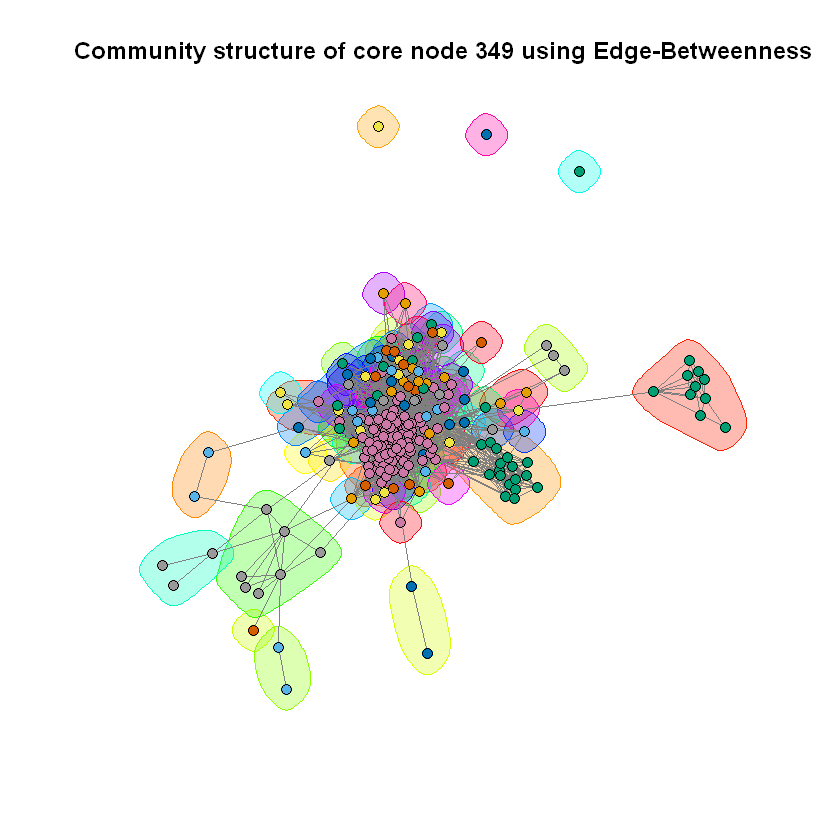

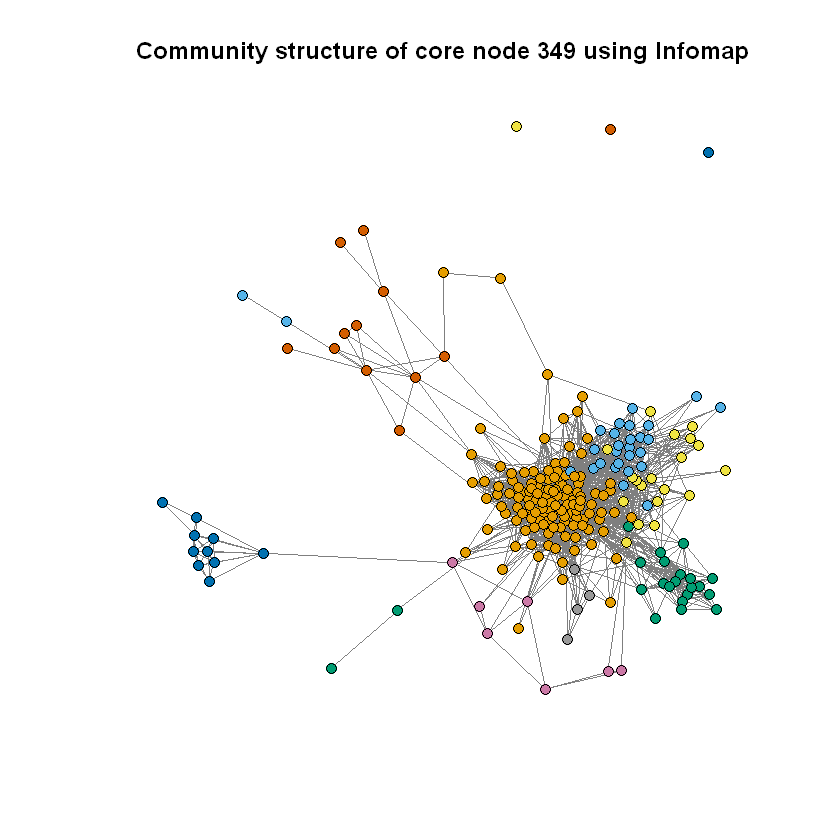


Modularity of core node 484 (Fast-Greedy): 0.5342142
Modularity of core node 484 (Edge-Betweenness): 0.5154413
Modularity of core node 484 (Infomap): 0.5434437

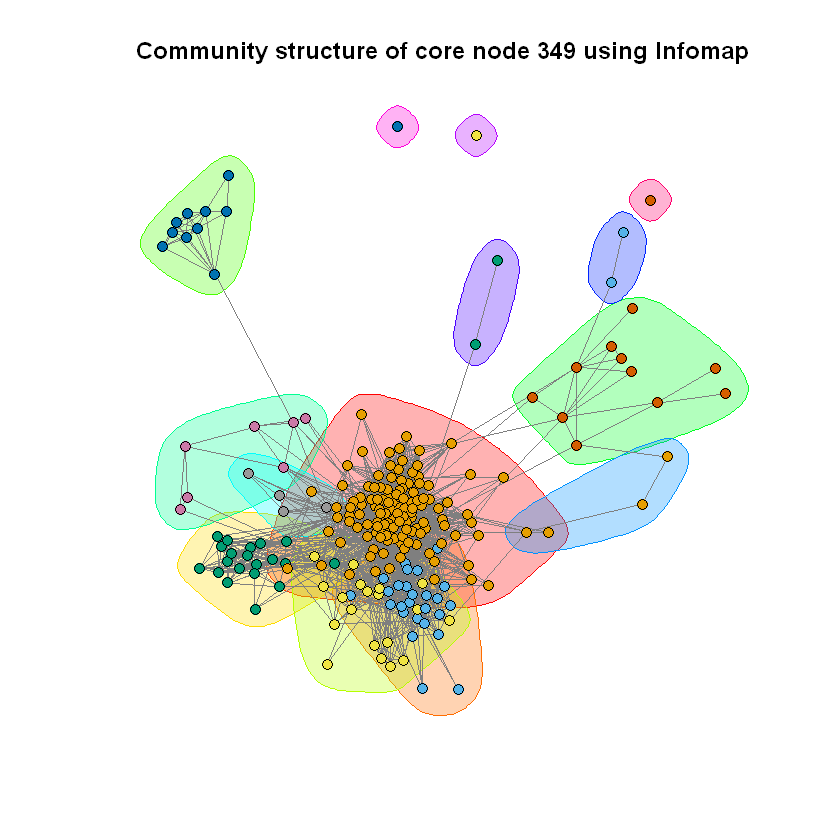

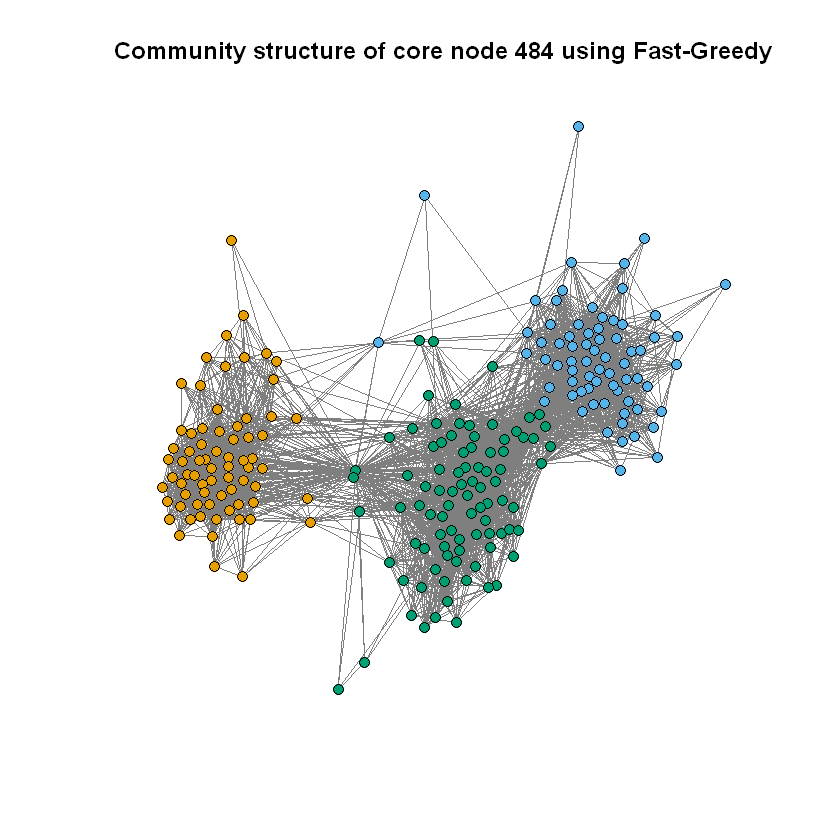

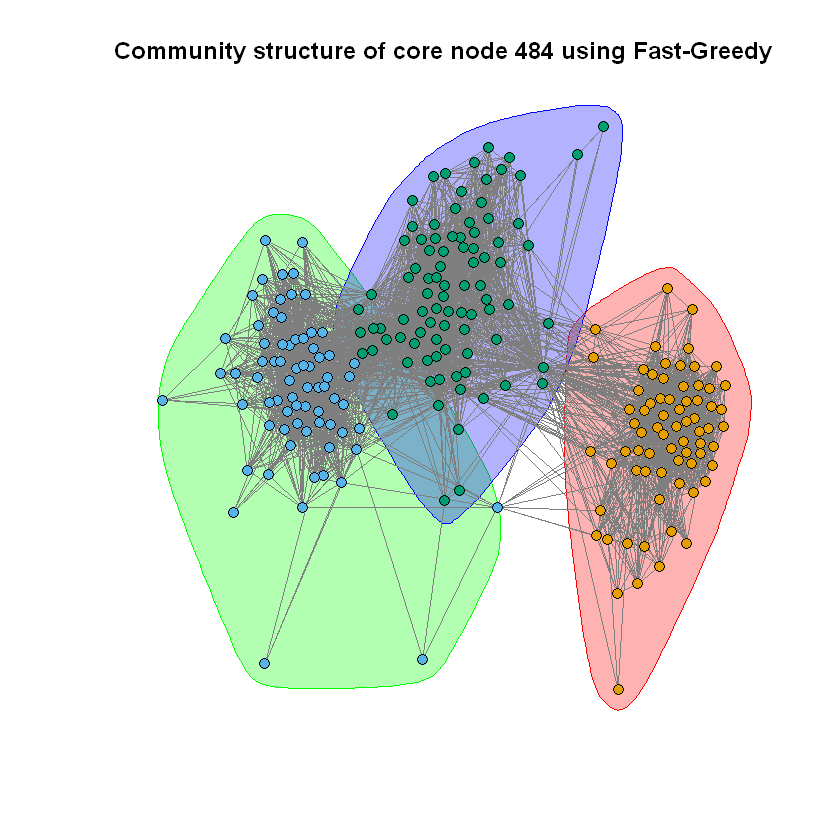

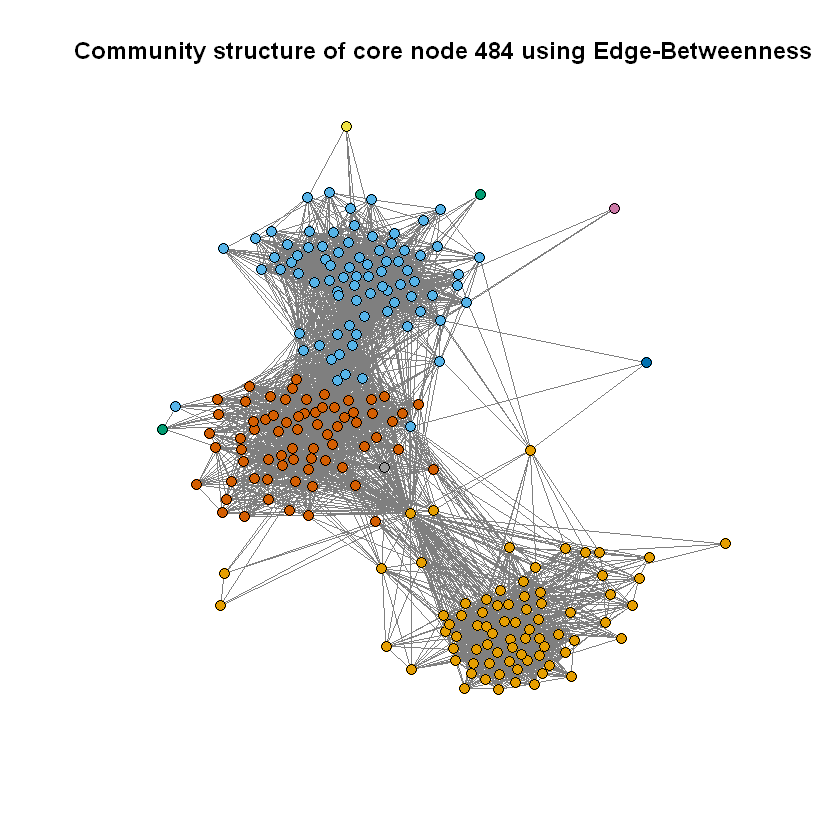

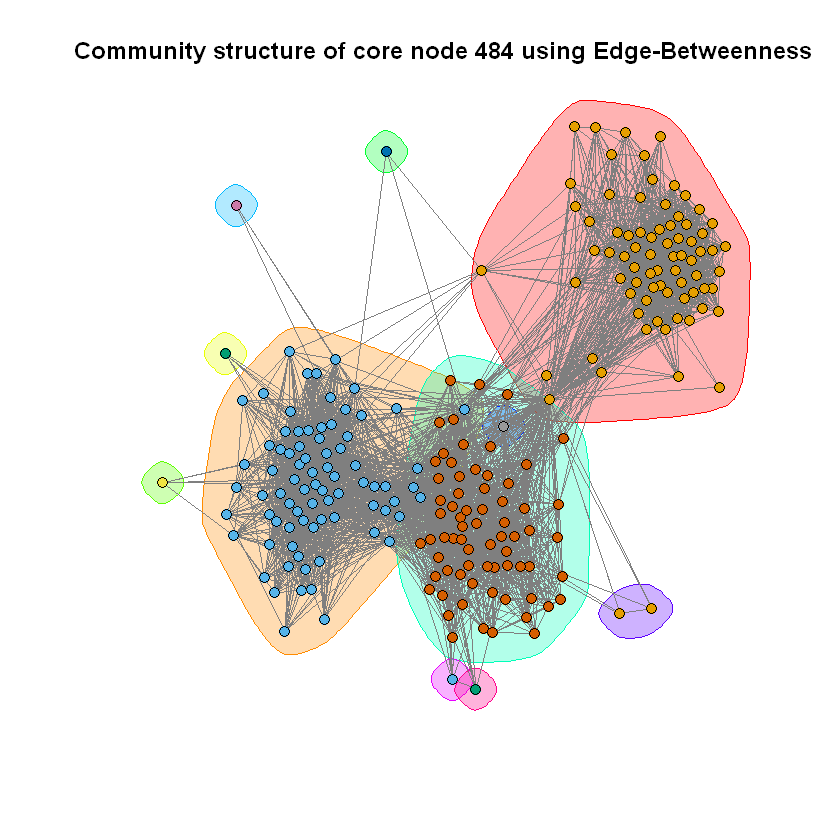

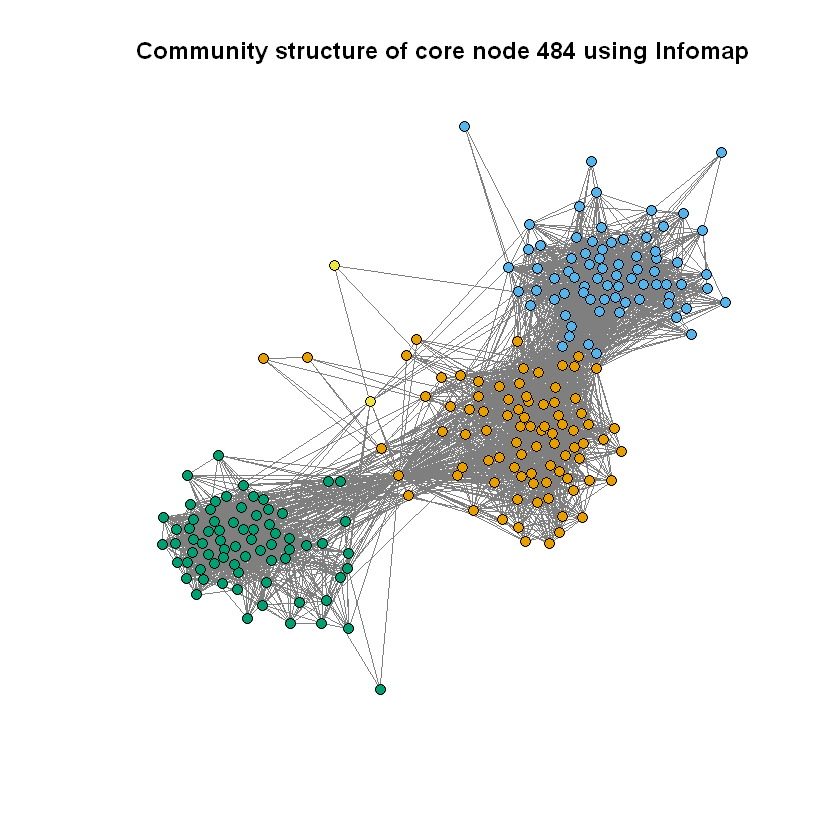


Modularity of core node 1087 (Fast-Greedy): 0.1481956
Modularity of core node 1087 (Edge-Betweenness): 0.0324953
Modularity of core node 1087 (Infomap): 0.02737159

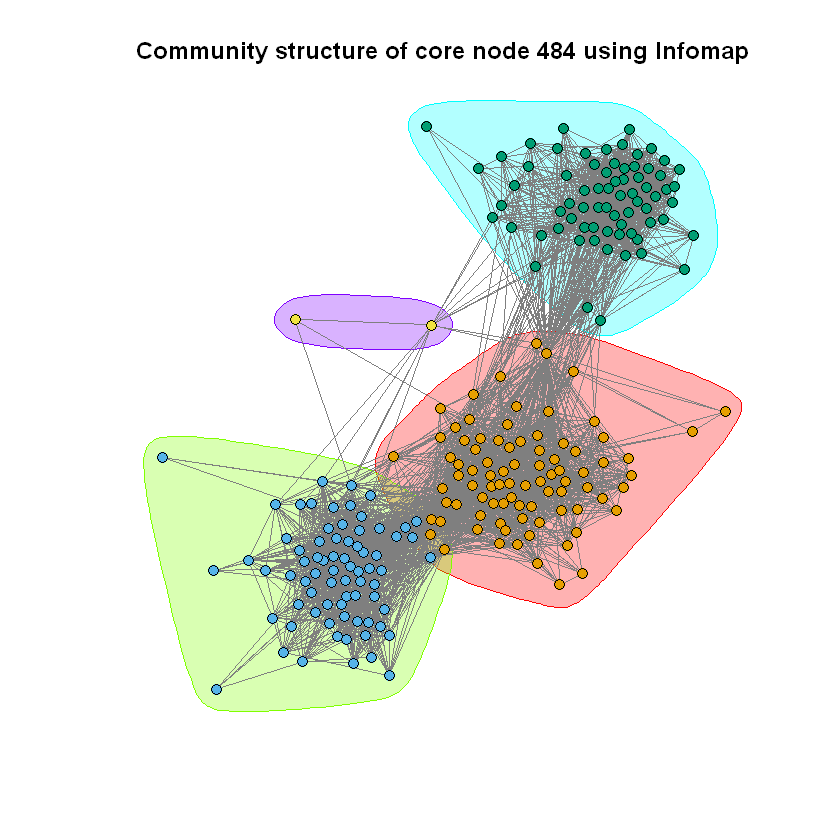

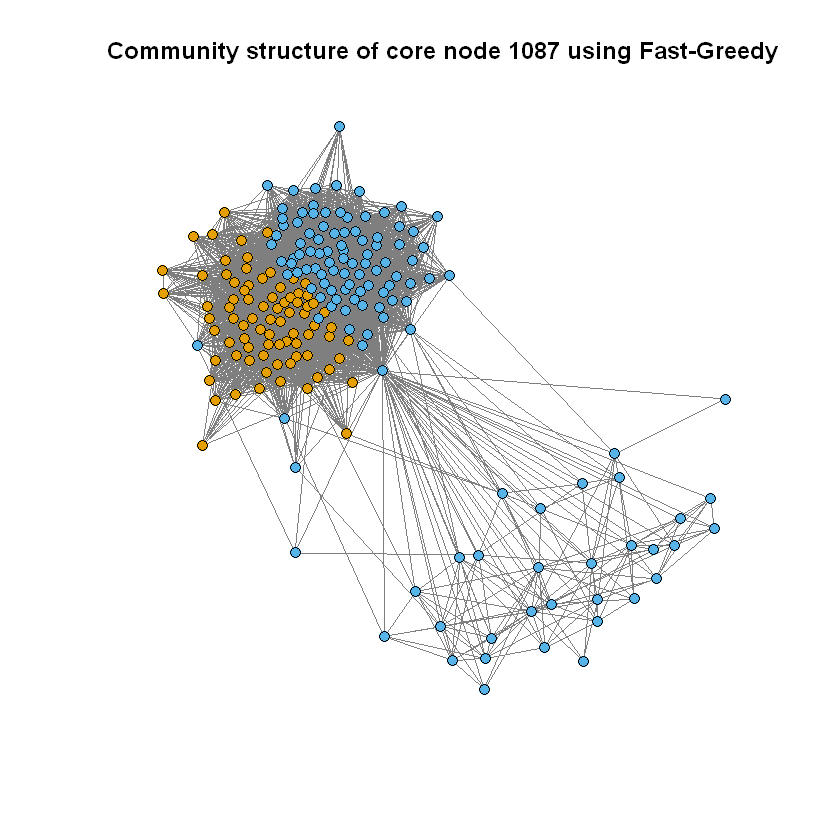

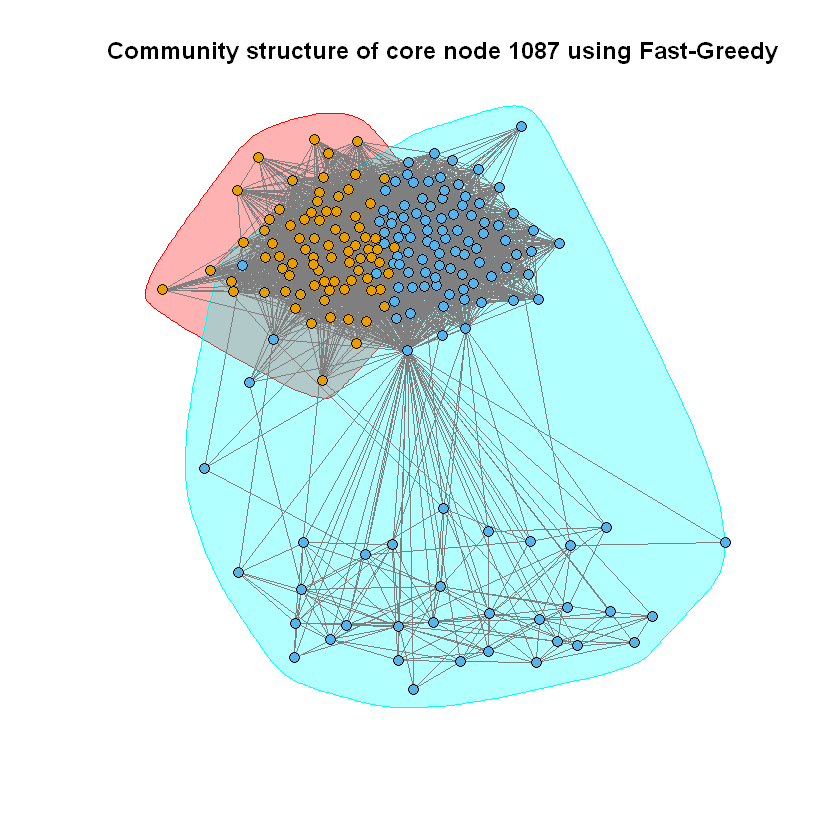

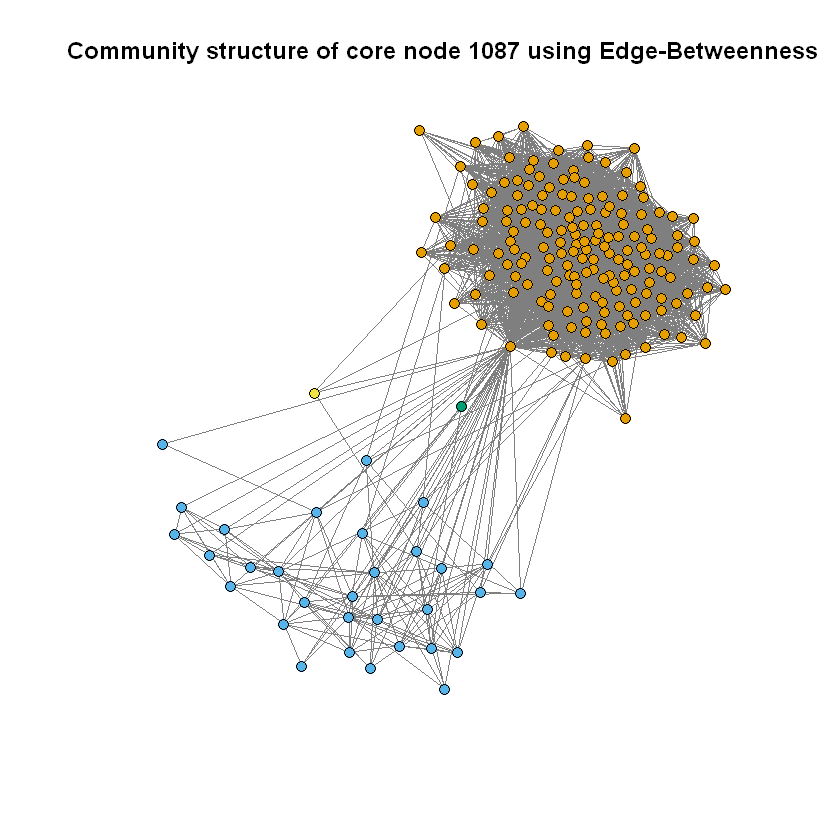

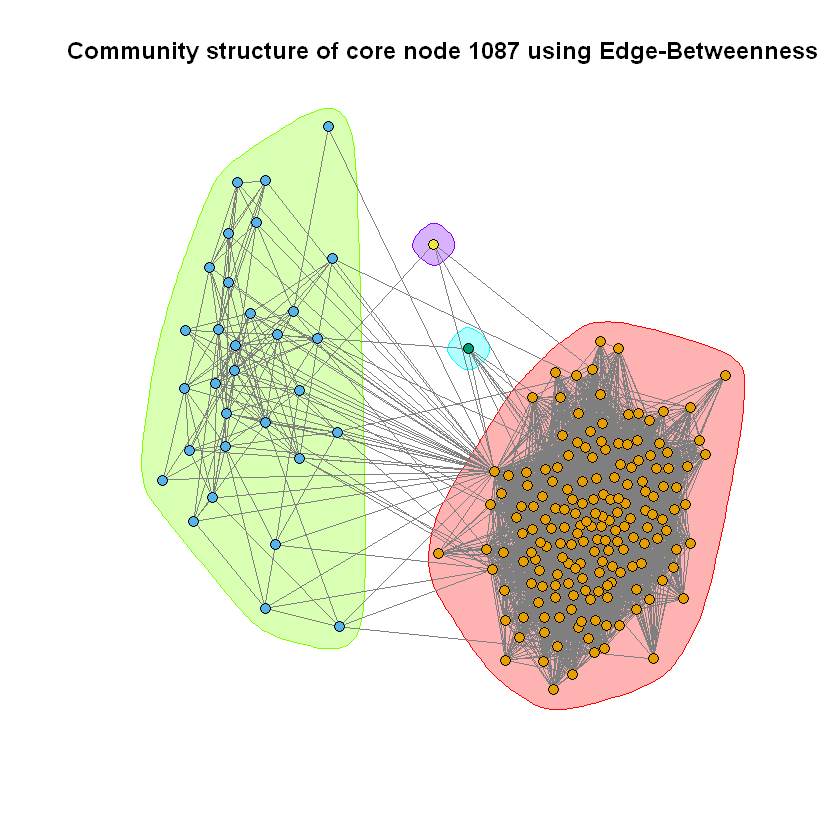

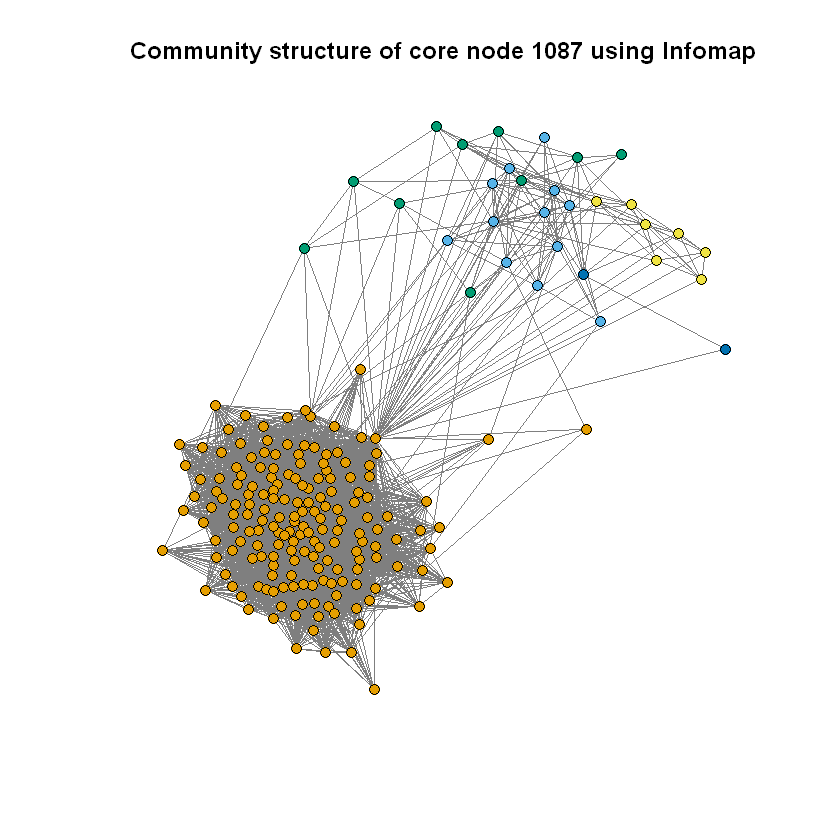

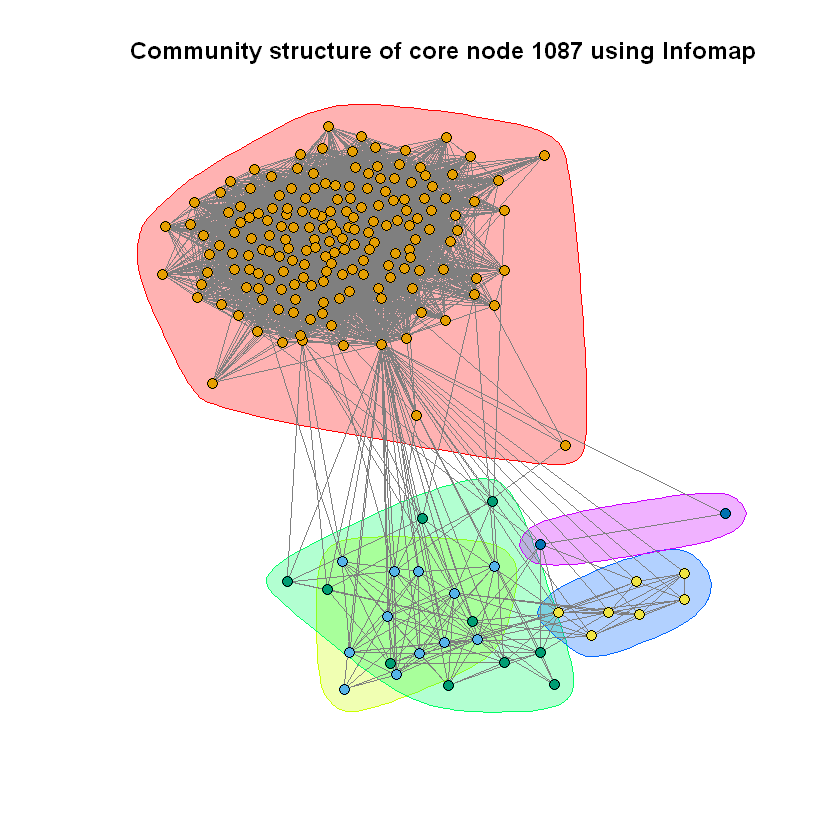

In [98]:
for (i in 1:length(target_nodes))
{
    # Use the neighbors only
    modified_network = induced.subgraph(facebook_net, neighbors(facebook_net, target_nodes[i]))
    display_communities(modified_network, target_nodes[i])
}

#### 1.3.3

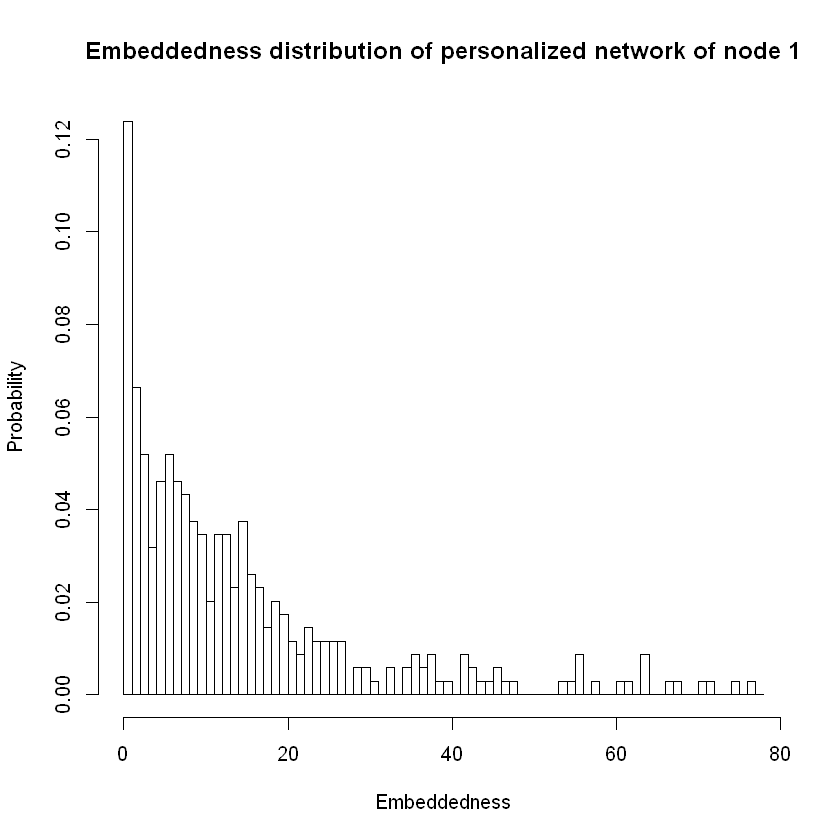

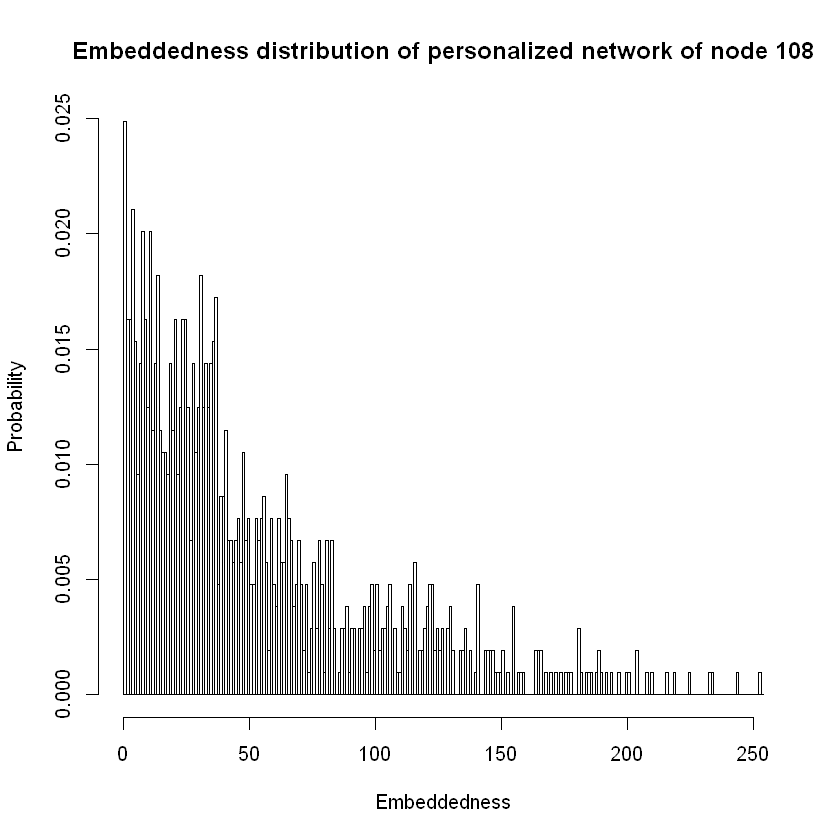

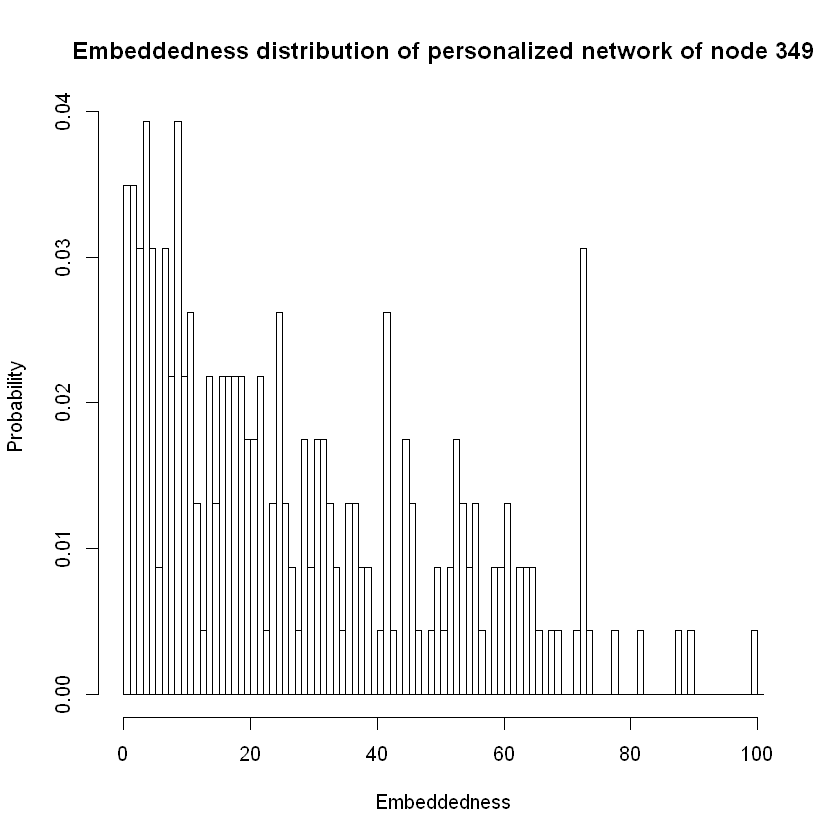

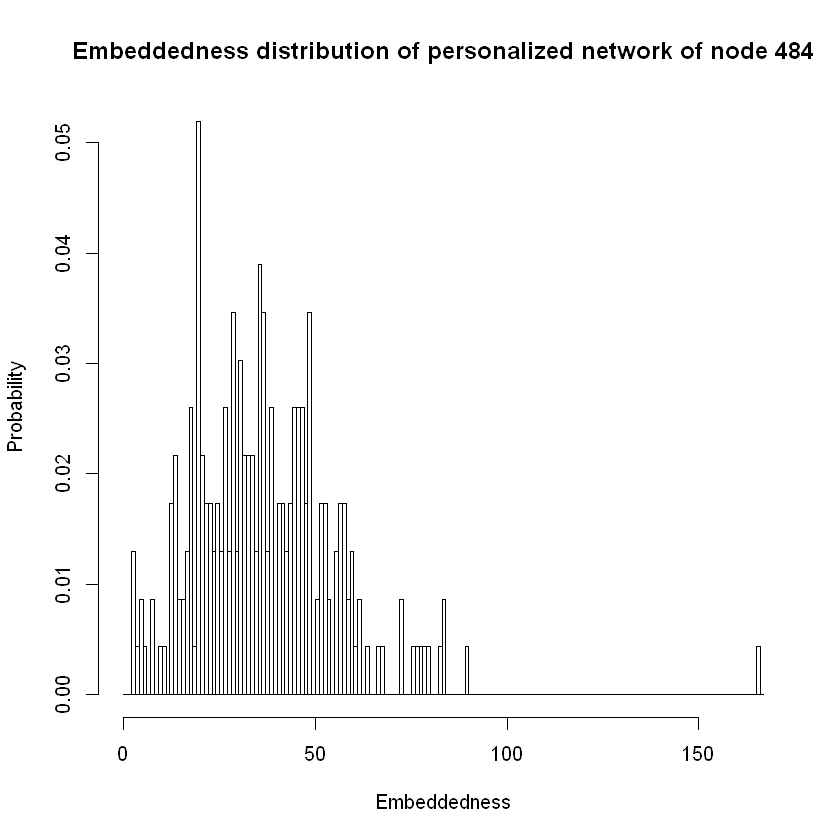

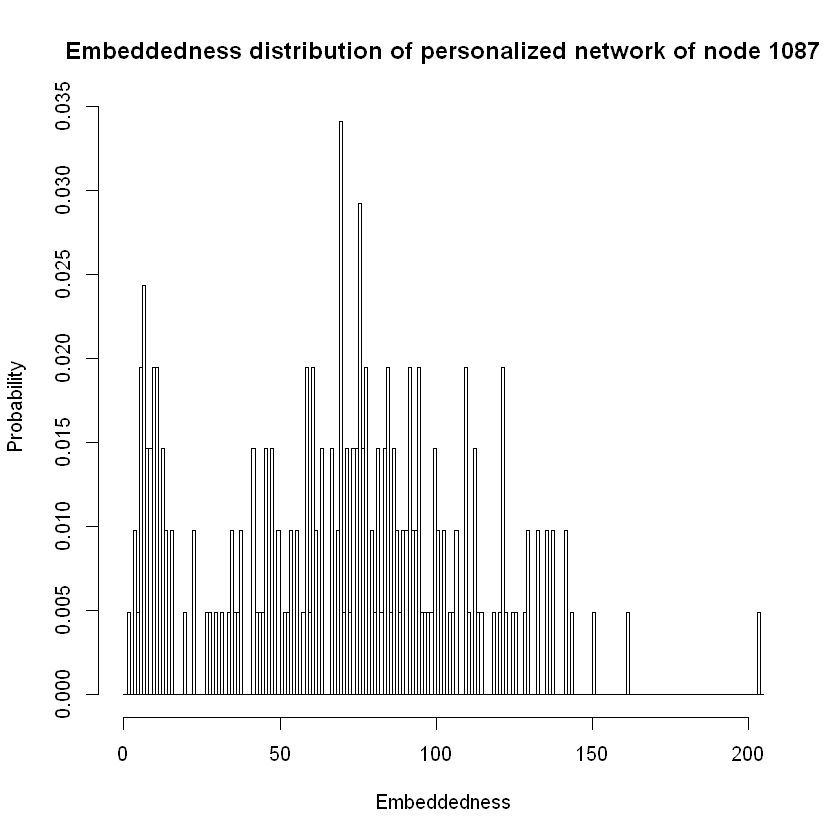

In [99]:
# Embeddedness
for (i in 1:length(target_nodes))
{
    embeddedness = sort(degree(target_node_networks[[i]])) - 1 # Sort to reomve the core node
    embeddedness = embeddedness[1:length(embeddedness)-1]
    hist(embeddedness, breaks=seq(0, max(embeddedness) + 1), 
         main=paste("Embeddedness distribution of personalized network of node", target_nodes[i]), 
         xlab="Embeddedness", ylab="Probability", freq=FALSE)
}

In [53]:
# Dispersion
dispersions = list()
for (i in 1:length(target_nodes))
{
    # Current personalized network
    cur_network = target_node_networks[[i]]
    cur_network_size = vcount(cur_network)
    dispersion = numeric(cur_network_size) # Initialize dispersion
    core_idx = match(target_nodes[i], V(cur_network)$name) # Get core node idx in the personalized network
    
    for (node_idx in 1:cur_network_size)
    {
        if (node_idx == core_idx) # No dispersion for the core node
        {
            dispersion[node_idx] = 0
        }
        else # Dispersion
        {
            # Find common neighbors
            common_neighbors_idx = find_common_neighbors(cur_network, node_idx, core_idx)
            if (length(common_neighbors_idx) <= 1) # No pair
            {
                dispersion[node_idx] = 0
            }
            else
            {
                common_neighbors_names = V(cur_network)$name[common_neighbors_idx] # Convert node idx to node names
                cur_network_deleted = delete.vertices(cur_network, c(node_idx, core_idx)) # Delete core node and current node
                neighbor_comb = combn(common_neighbors_names, 2) # All pair combinations
                
                for (k in 1:(length(neighbor_comb) / 2))
                {
                    node_i_name = neighbor_comb[1, k]
                    node_j_name = neighbor_comb[2, k]
                    
                    # Convert node name into idx in the deleted network
                    node_i_idx = match(node_i_name, V(cur_network_deleted)$name)
                    node_j_idx = match(node_j_name, V(cur_network_deleted)$name)
                    dispersion[node_idx] = dispersion[node_idx] + find_distance(cur_network_deleted, node_i_idx, node_j_idx, upper_bound=10)
                }
            }    
        }
    }
    dispersions[[length(dispersions) + 1]] = dispersion # Store the current dispersion
}

In [4]:
# Save dispersions
#saveRDS(dispersions, file="dispersions.rds")
# Read dispersions
dispersions = readRDS(file="dispersions.rds")

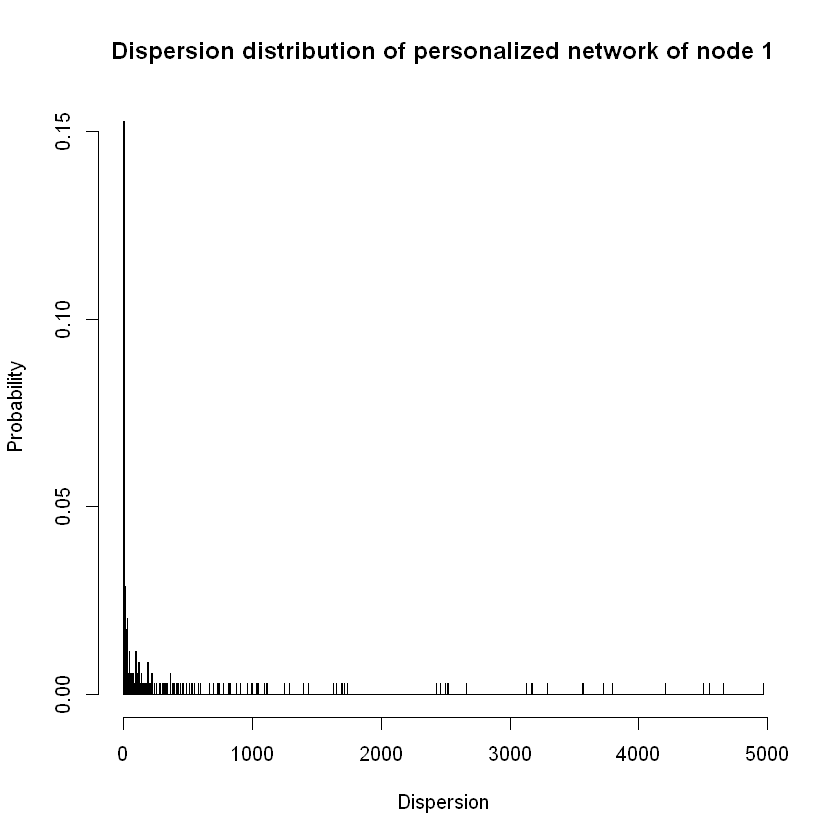

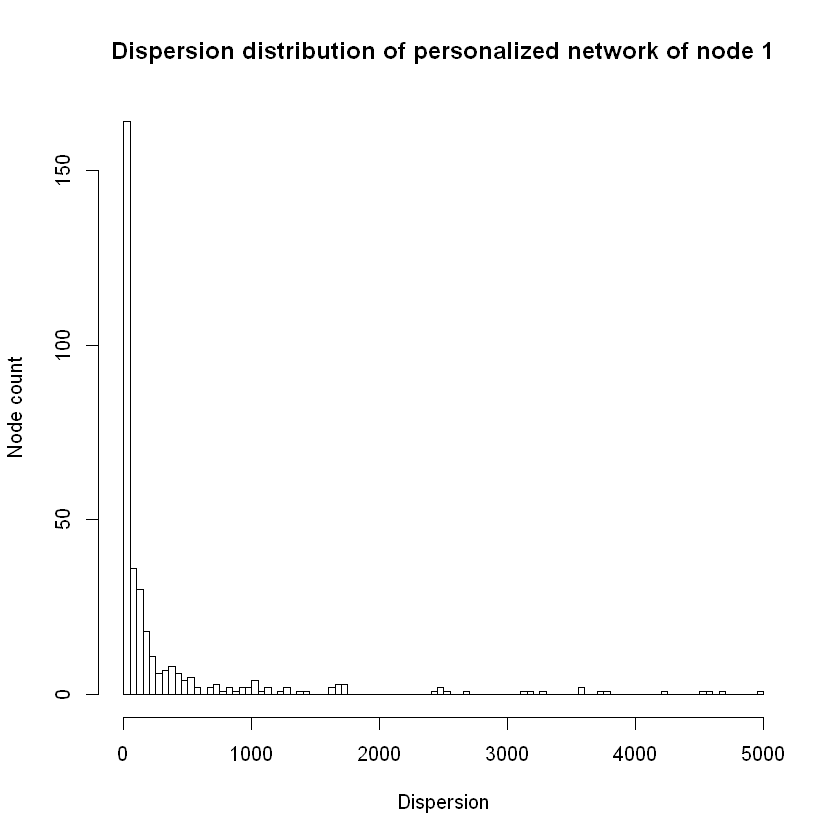

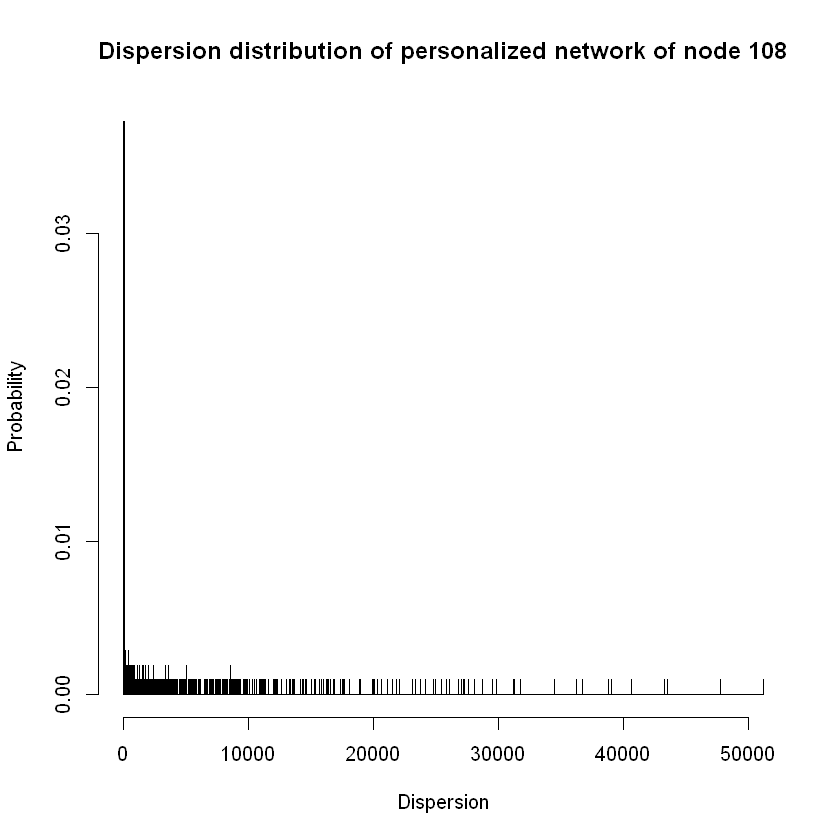

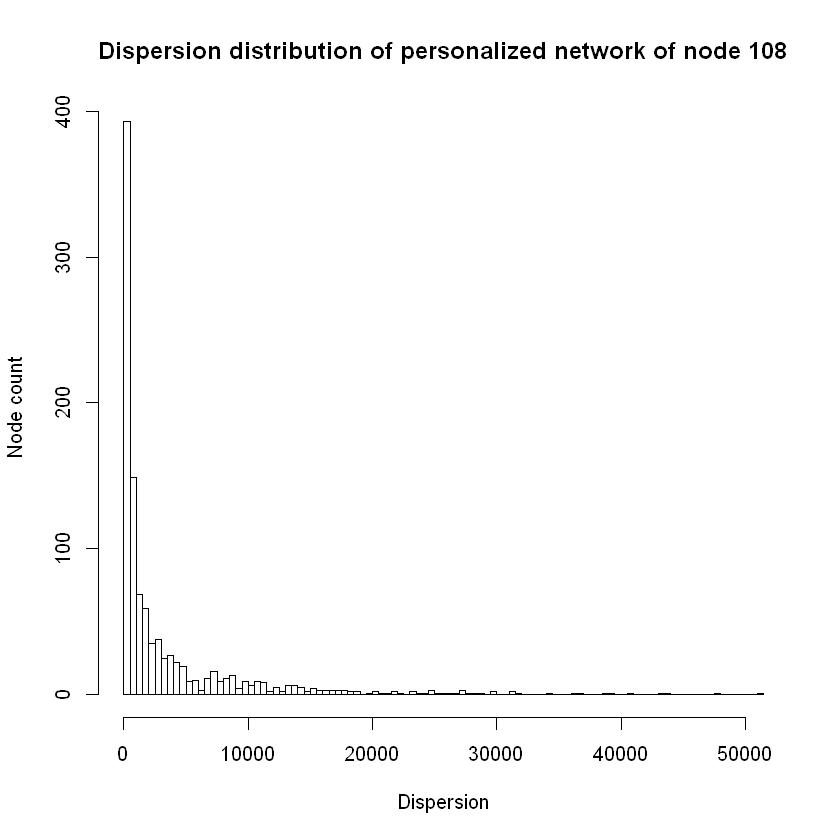

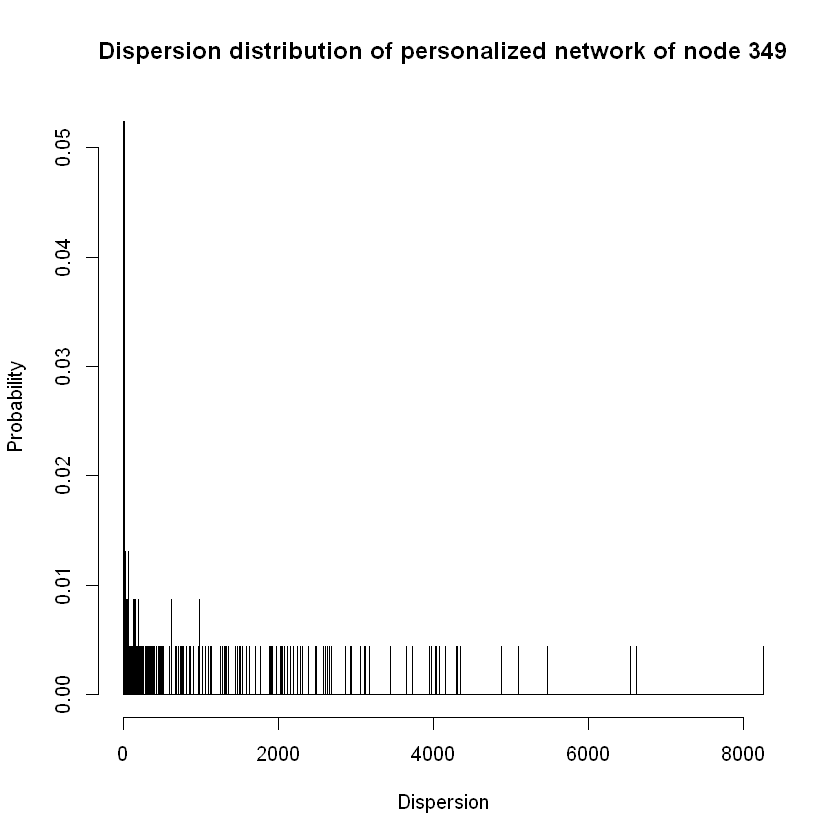

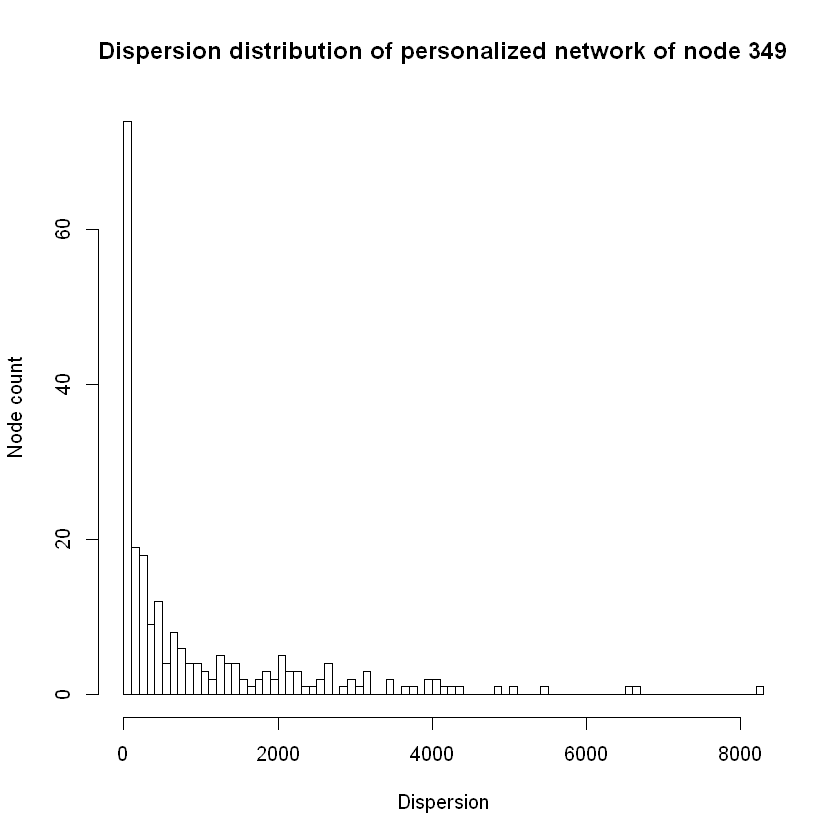

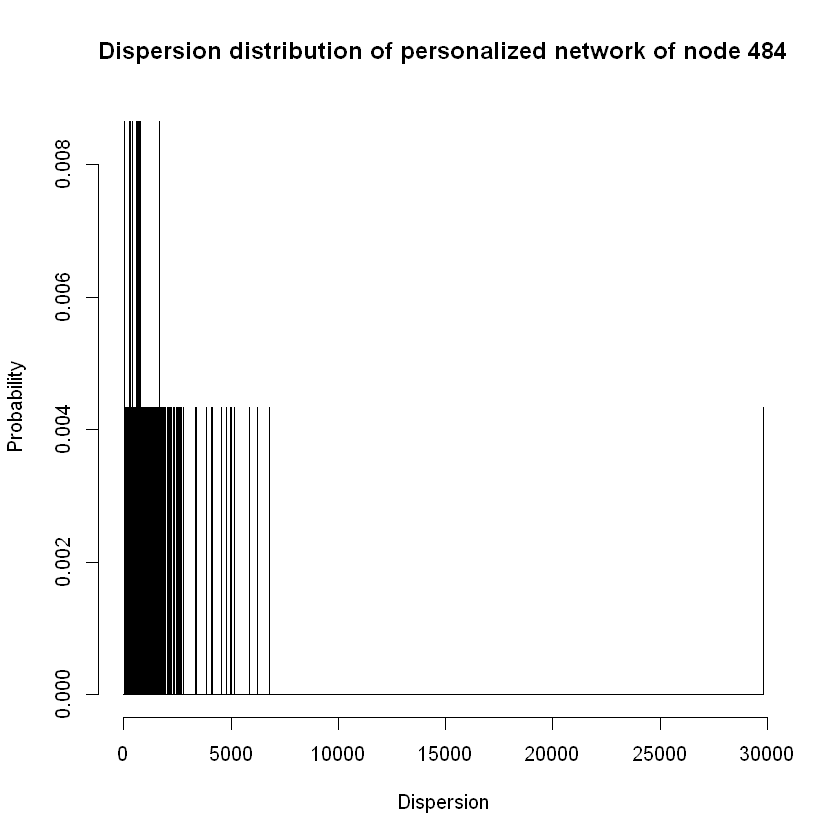

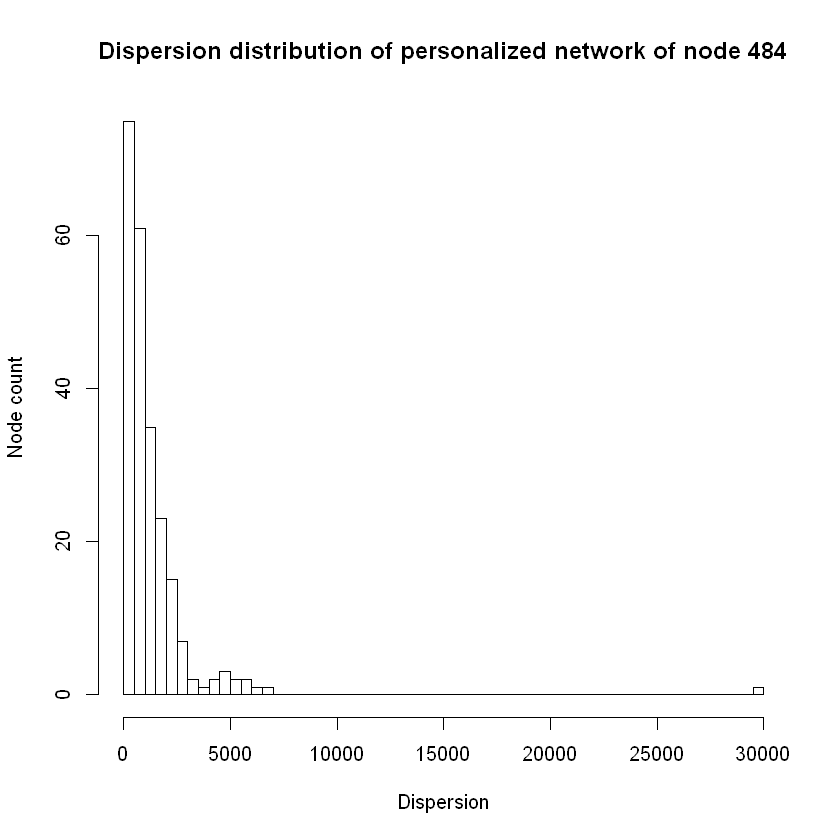

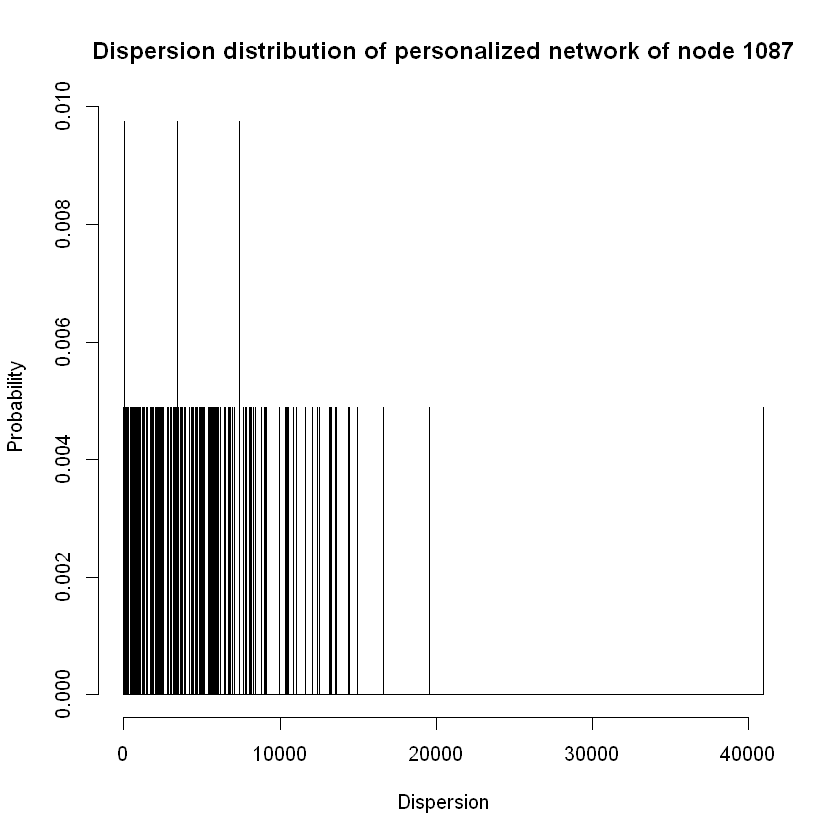

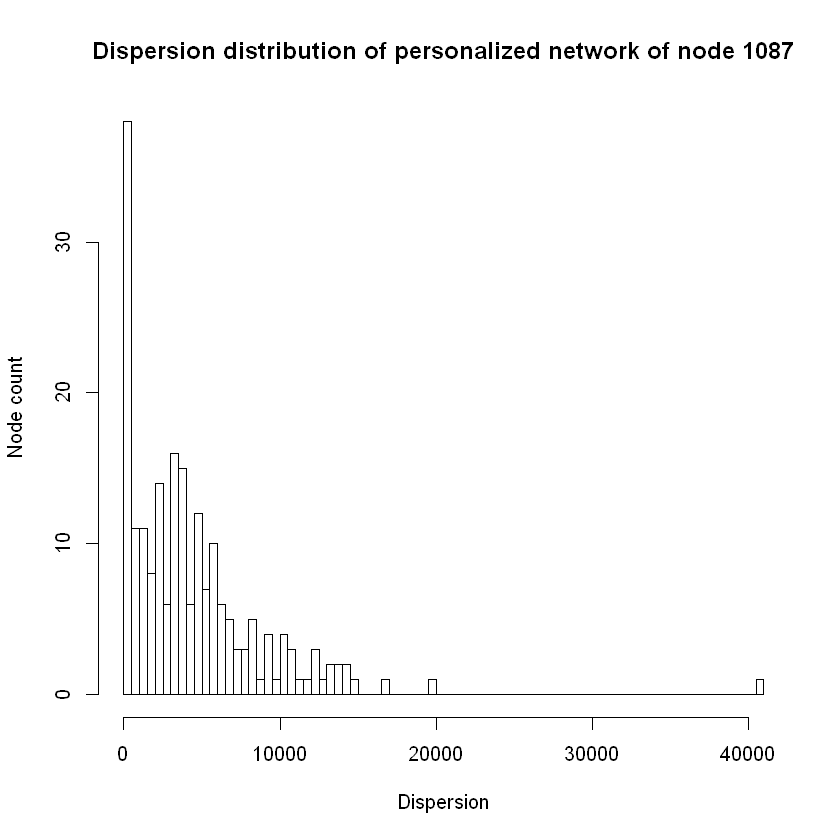

In [11]:
for (i in 1:length(target_nodes))
{
    # Current personalized network
    cur_network = target_node_networks[[i]]
    core_idx = match(target_nodes[i], V(cur_network)$name) # Get core node idx in the personalized network
    
    # Remove the core node in the dispersion
    dispersion = dispersions[[i]]
    dispersion = dispersion[-core_idx]
    
    # Plot histogram
    hist(dispersion, breaks=seq(0, max(dispersion) + 1), 
         main=paste("Dispersion distribution of personalized network of node", target_nodes[i]), 
         xlab="Dispersion", ylab="Probability", freq=FALSE)
    
    hist(dispersion, breaks = 100, 
         main=paste("Dispersion distribution of personalized network of node", target_nodes[i]), 
         xlab="Dispersion", ylab="Node count")
}



Personalized network of node 1 :
Node with max dispersion: 57
Node with max embeddedness: 57
Node with max quotient: 26

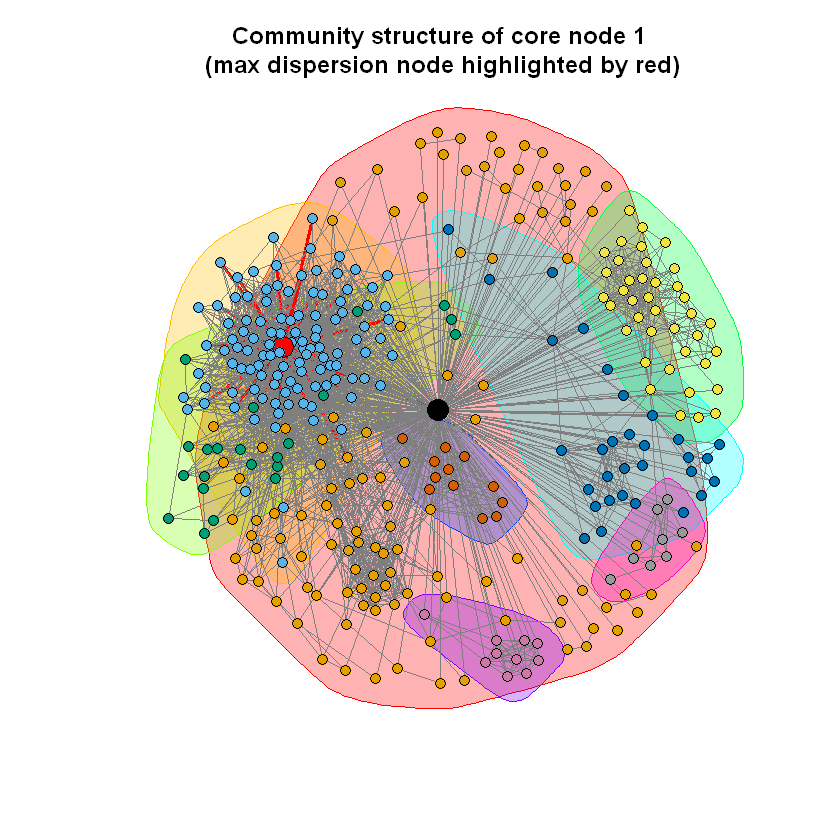



Personalized network of node 108 :
Node with max dispersion: 1889
Node with max embeddedness: 1889
Node with max quotient: 1889

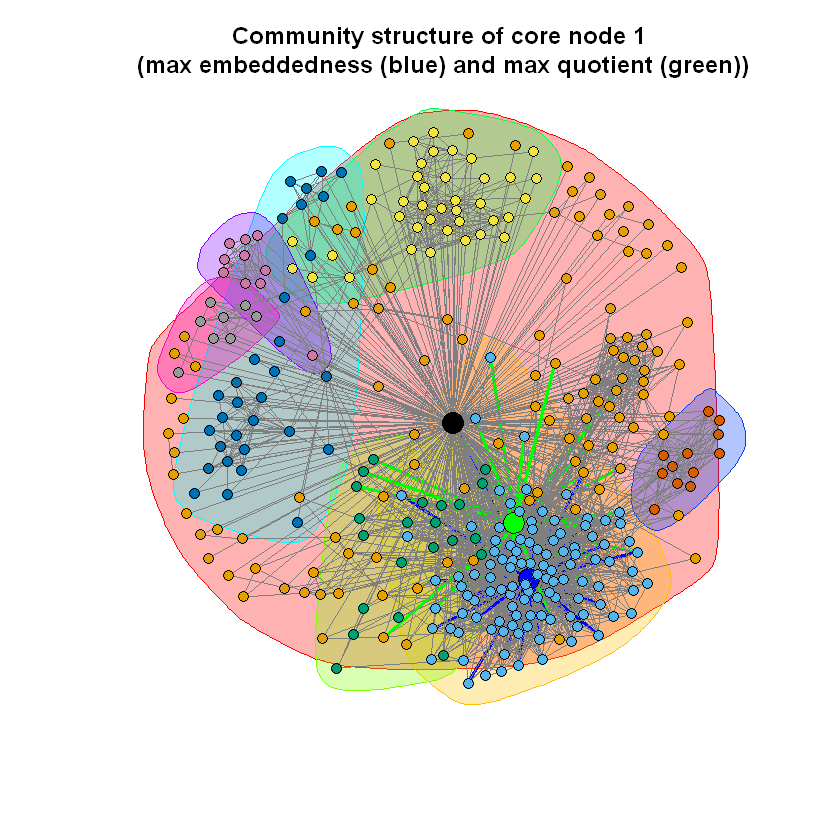

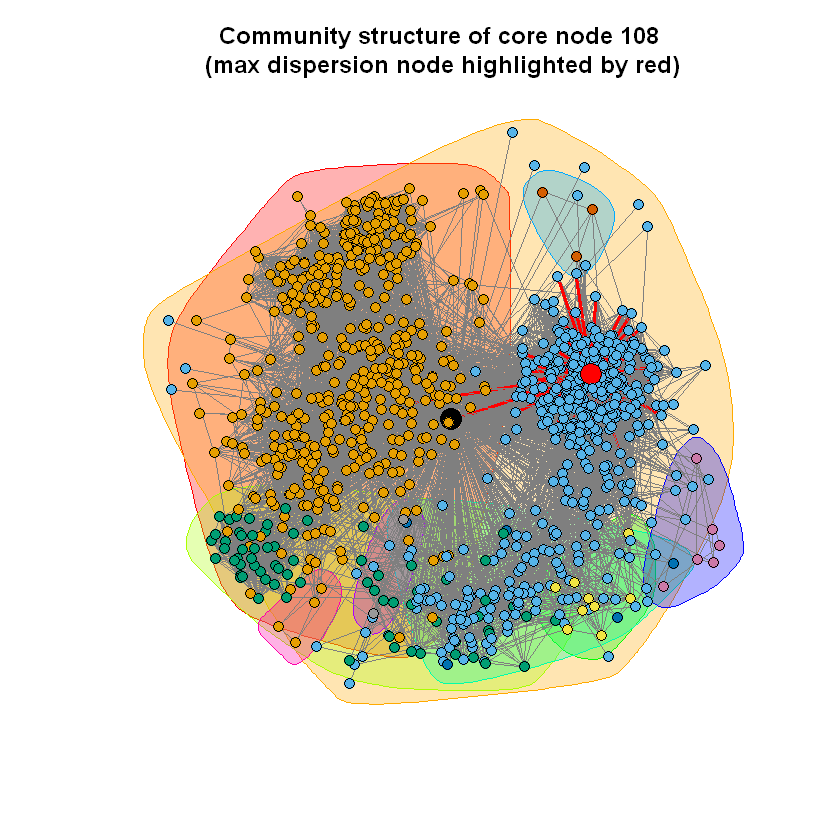



Personalized network of node 349 :
Node with max dispersion: 377
Node with max embeddedness: 377
Node with max quotient: 377

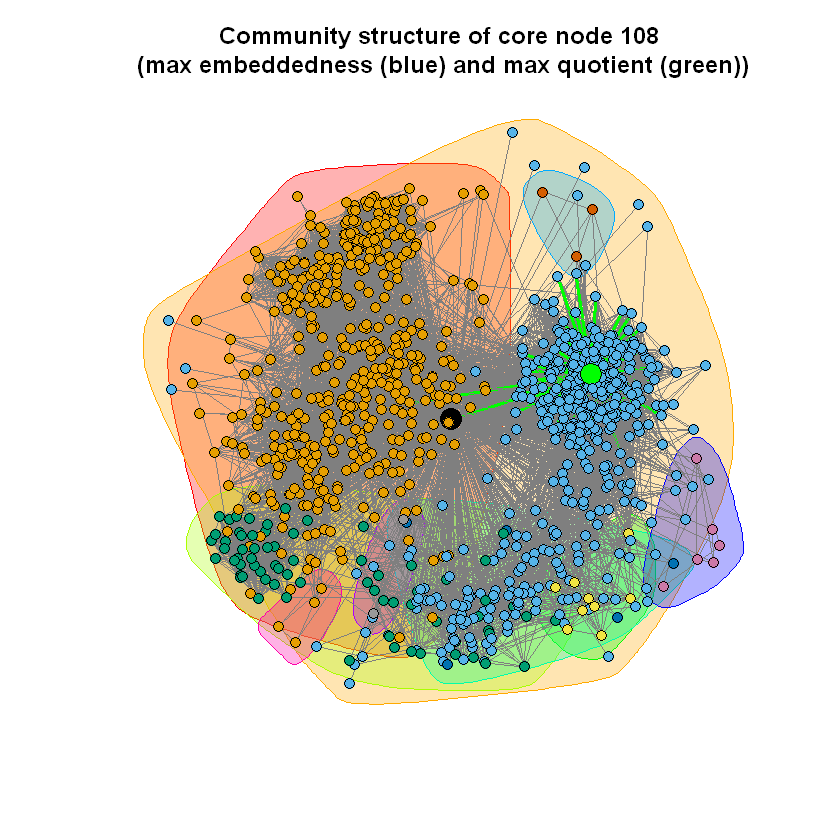

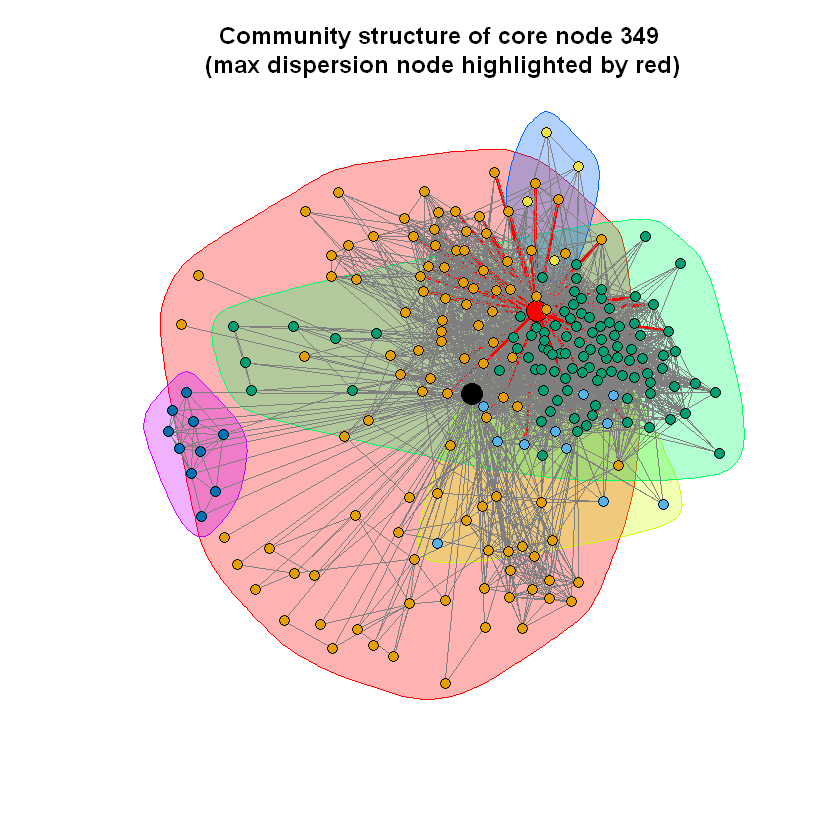



Personalized network of node 484 :
Node with max dispersion: 108
Node with max embeddedness: 108
Node with max quotient: 108

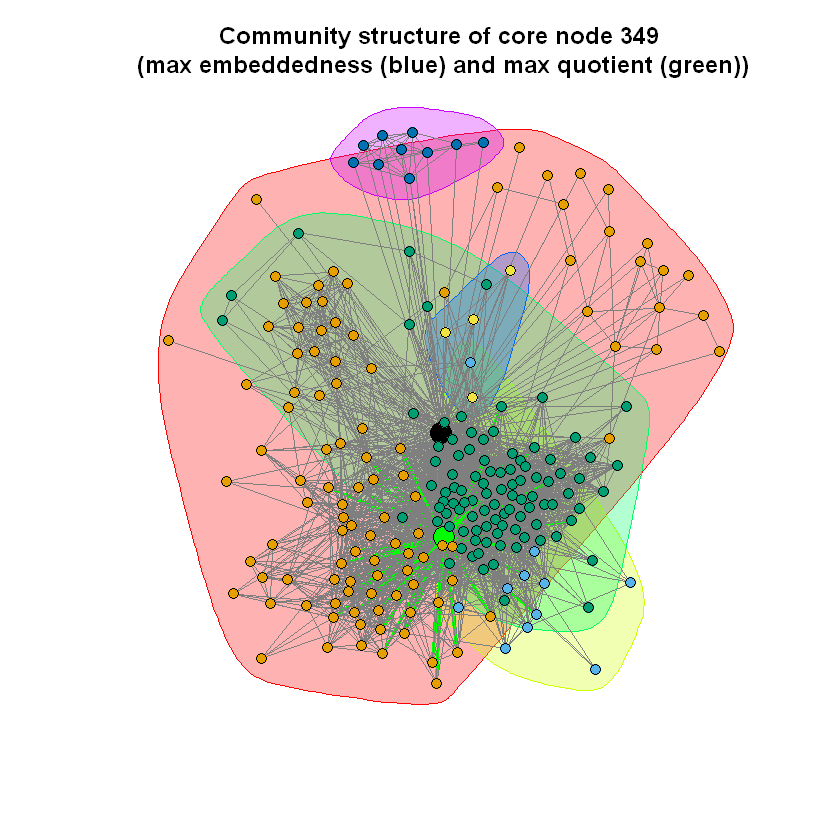

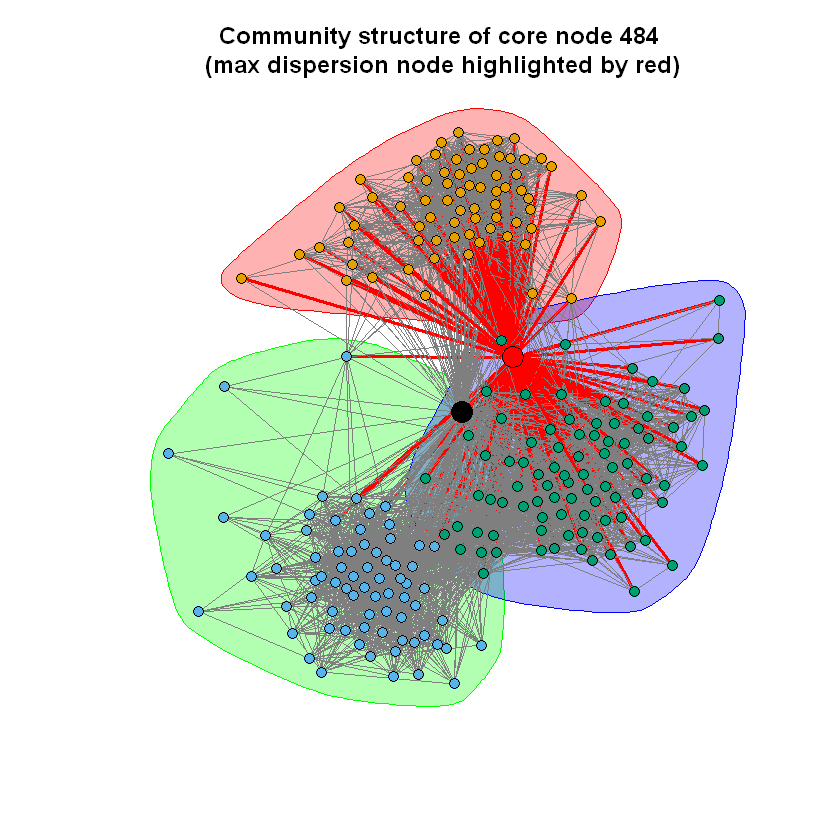



Personalized network of node 1087 :
Node with max dispersion: 108
Node with max embeddedness: 108
Node with max quotient: 108

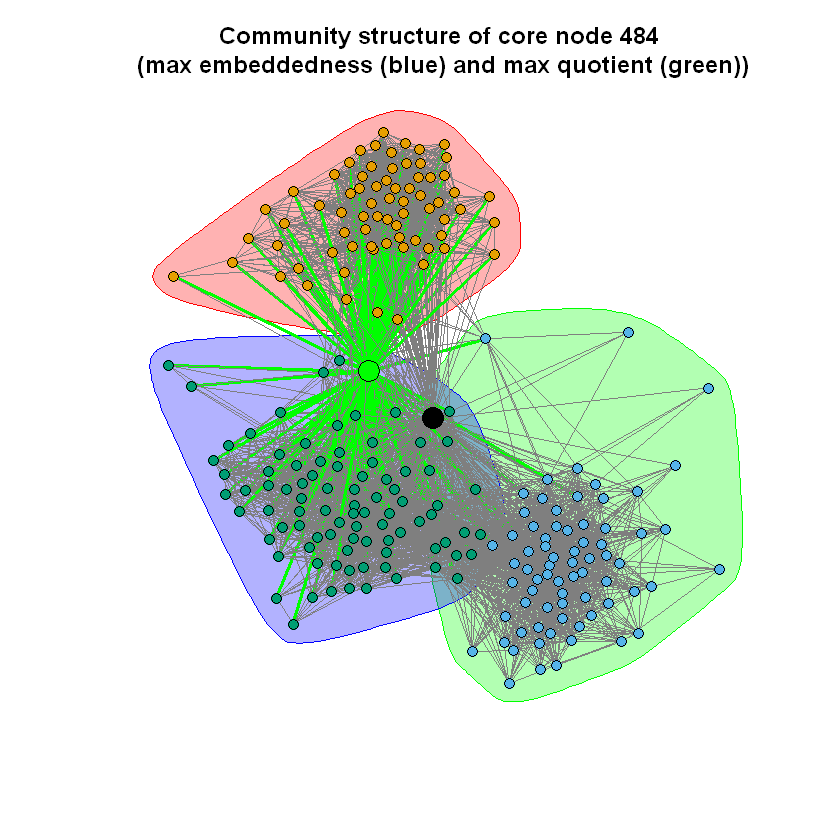

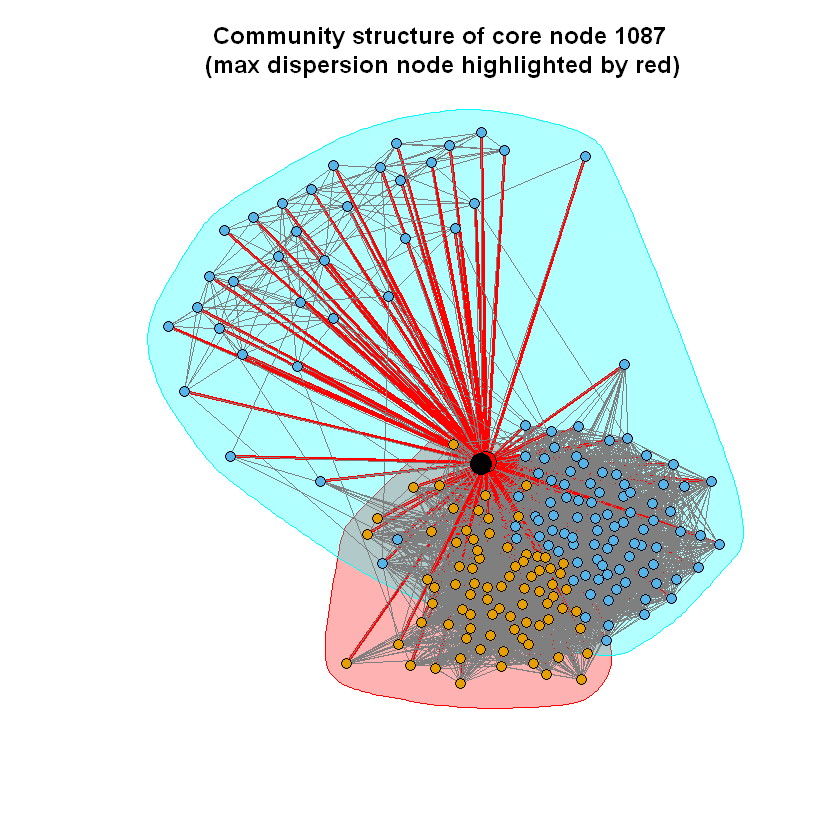

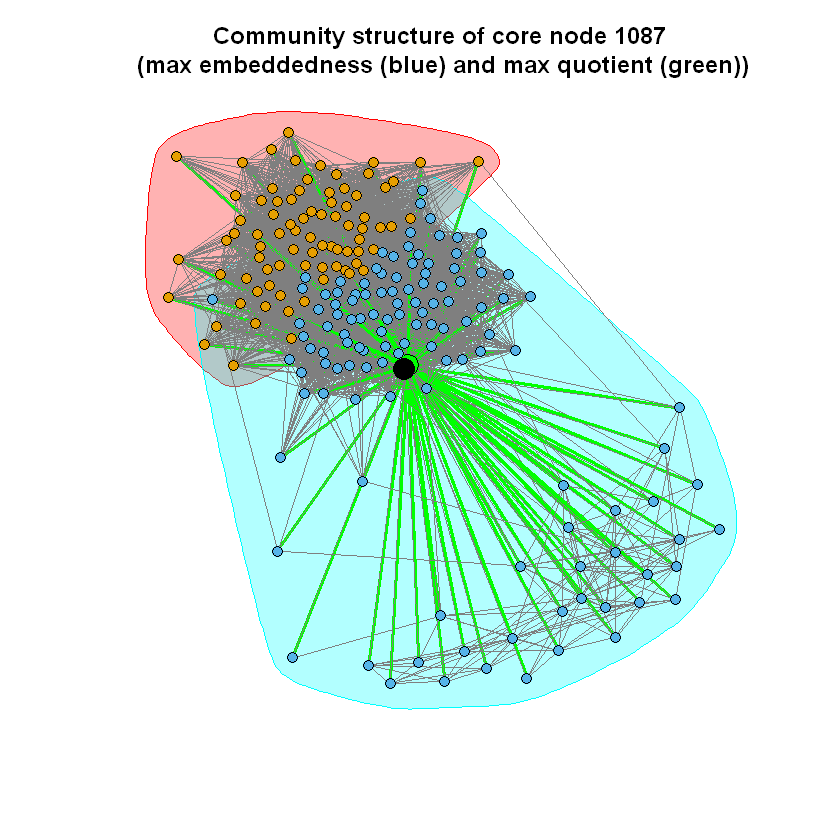

In [101]:
# Highlight nodes
for (i in 1:length(target_nodes))
{
    # Current personalized network
    cur_network = target_node_networks[[i]]
    core_idx = match(target_nodes[i], V(cur_network)$name) # Get core node idx in the personalized network
    
    # Dispersion and embeddedness
    dispersion = dispersions[[i]]
    embeddedness = degree(cur_network) - 1
    embeddedness[core_idx] = 0.1 # Set the embeddedness of the core node to be 0.1 to avoid confusion
    
    node_max_dispersion = which(dispersion == max(dispersion))
    node_max_embeddedness = which(embeddedness == max(embeddedness))
    quotient = dispersion / embeddedness
    quotient[is.nan(quotient)] = 1 # Define 0/0 = 0
    node_max_quotient = which(quotient == max(quotient))
    
    cat("\n\nPersonalized network of node", target_nodes[i], ":")
    cat("\nNode with max dispersion:", V(cur_network)$name[node_max_dispersion])
    cat("\nNode with max embeddedness:", V(cur_network)$name[node_max_embeddedness])
    cat("\nNode with max quotient:", V(cur_network)$name[node_max_quotient])
    
    # Fast-Greedy
    fast_greedy_community = fastgreedy.community(cur_network)
    
    # Highlight dispersion
    
    # Plot setting
    node_col = fast_greedy_community$membership
    node_col[node_max_dispersion] = "red"
    node_col[core_idx] = "black"
    node_size = rep(4, vcount(cur_network))
    node_size[node_max_dispersion] = 8
    node_size[core_idx] = 8
    edge_color = rep("grey50", ecount(cur_network))
    edge_width = rep(1, ecount(cur_network))
    
    for (k in node_max_dispersion) # In case of multiple max nodes
    {
        edge_color[which(get.edgelist(cur_network, name=FALSE)[,1] == k | 
                         get.edgelist(cur_network, name=FALSE)[,2] == k)] = "red"
        edge_width[which(get.edgelist(cur_network, name = FALSE)[,1] == k |  
                     get.edgelist(cur_network, name = FALSE)[,2] == k)] = 3
    }

    # Plot community
    plot(fast_greedy_community, cur_network, vertex.size=node_size, vertex.label=NA, 
         col=node_col, edge.color=edge_color, edge.width=edge_width, layout=layout.fruchterman.reingold, 
         main=paste("Community structure of core node", target_nodes[i], "\n(max dispersion node highlighted by red)"))
    
    # Highlight embeddednes and quotient
    
    # Plot setting
    node_col = fast_greedy_community$membership
    node_col[node_max_embeddedness] = "blue"
    node_col[node_max_quotient] = "green"
    node_col[core_idx] = "black"
    
    node_size = rep(4, vcount(cur_network))
    node_size[node_max_embeddedness] = 8
    node_size[node_max_quotient] = 8
    node_size[core_idx] = 8
    
    edge_color = rep("grey50", ecount(cur_network))
    edge_width = rep(1, ecount(cur_network))
    
    for (k in node_max_embeddedness) # In case of multiple max nodes
    {
        edge_color[which(get.edgelist(cur_network, name=FALSE)[,1] == k | 
                         get.edgelist(cur_network, name=FALSE)[,2] == k)] = "blue"
        edge_width[which(get.edgelist(cur_network, name = FALSE)[,1] == k |  
                     get.edgelist(cur_network, name = FALSE)[,2] == k)] = 3
    }
    
    for (k in node_max_quotient) # In case of multiple max nodes
    {
        edge_color[which(get.edgelist(cur_network, name=FALSE)[,1] == k | 
                         get.edgelist(cur_network, name=FALSE)[,2] == k)] = "green"
        edge_width[which(get.edgelist(cur_network, name = FALSE)[,1] == k |  
                     get.edgelist(cur_network, name = FALSE)[,2] == k)] = 3
    }

    # Plot community
    plot(fast_greedy_community, cur_network, vertex.size=node_size, vertex.label=NA, 
         col=node_col, edge.color=edge_color, edge.width=edge_width, layout=layout.fruchterman.reingold, 
         main=paste("Community structure of core node", target_nodes[i], 
                    "\n(max embeddedness (blue) and max quotient (green))"))
}

#### 1.4.3

In [5]:
core_name = 415
friend_net = find_personalized_network(facebook_net, core_name)
core_idx = match(core_name, V(friend_net)$name) # Core node index
users_idx = c()  # User index in the personalized network
users_name = c() # User ID in the facebook network
for (node in 1:vcount(friend_net))
{
    if (degree(friend_net)[node] == 24)
    {
        users_idx = c(users_idx, node)
        users_name = c(users_name, V(friend_net)$name[node]) #  Store the user nodes
    }
}
cat("\nNumber of target users:", length(users_name))
cat("\nUser node ID:", users_name)



Personalized network of Node 415 :
Number of nodes: 160
Number of edges: 1857
Diameter:  2
Number of target users: 11
User node ID: 497 579 601 616 619 628 644 659 660 662 663

#### 1.4.4

In [27]:
recommendation_accuracy = function(recommended_friends, true_friends)
{
    if(length(true_friends) ==0)
    {
        return (1) # Do not delete any edges
    }
    else
    {
        return (length(intersect(true_friends, recommended_friends)) / length(true_friends))
    }
}

common_neighbor_measure = function(graph, target_node, friends)
{
    # Common Neighbors measure
    network_size = vcount(graph)
    measure = numeric(network_size)
    target_node_neighbors = neighbors(graph, target_node)
    
    for (node in 1:network_size)
    {
        cur_node_neighbors = neighbors(graph, node)
        intersect_neighbors_size = length(intersect(target_node_neighbors, cur_node_neighbors))
        measure[node] = intersect_neighbors_size
    }
    measure[friends] = -1 # Set the measure for friends to be -1
    measure[target_node] = -1 # Set the measure for target node to be -1
    return (measure)
}

jaccard_measure = function(graph, target_node, friends)
{
    # Jaccard measure
    network_size = vcount(graph)
    measure = numeric(network_size)
    target_node_neighbors = neighbors(graph, target_node)
    
    for (node in 1:network_size)
    {
        cur_node_neighbors = neighbors(graph, node)
        intersect_neighbors_size = length(intersect(target_node_neighbors, cur_node_neighbors))
        union_neighbors_size = length(union(target_node_neighbors, cur_node_neighbors))
        measure[node] = intersect_neighbors_size / union_neighbors_size
    }
    measure[friends] = -1 # Set the measure for friends to be -1
    measure[target_node] = -1 # Set the measure for target node to be -1
    return (measure)
}

adamic_adar_measure = function(graph, target_node, friends)
{
    # Adamic Adar measure
    network_size = vcount(graph)
    measure = numeric(network_size)
    target_node_neighbors = neighbors(graph, target_node)
    
    for (node in 1:network_size)
    {
        cur_node_neighbors = neighbors(graph, node)
        intersect_neighbors = intersect(target_node_neighbors, cur_node_neighbors)
        
        for (node_k in intersect_neighbors)
        {
            node_k_neighbors_size = length(neighbors(graph, node_k))
            measure[node] = measure[node] + (1 / log(node_k_neighbors_size))
        }
    }
    measure[friends] = -1 # Set the measure for friends to be -1
    measure[target_node] = -1 # Set the measure for target node to be -1
    return (measure)
}

In [30]:
# Setting
delete_prob = 0.25
iteration_times = 10
users_idx_size = length(users_idx)

# Store accuracy
common_neighbor_acc = numeric(users_idx_size)
jaccard_acc = numeric(users_idx_size)
adamic_adar_acc = numeric(users_idx_size)
indicator = 1

for (user_idx in users_idx)
{
    cat("\n\nUser:", users_name[indicator])
    for (iteration in 1:iteration_times)
    {
        # Find all friends
        friends_idx = neighbors(friend_net, user_idx) 

        # Find edge index
        user_edges_idx = which(get.edgelist(friend_net, name=FALSE)[, 1] == user_idx | 
                               get.edgelist(friend_net, name=FALSE)[, 2] == user_idx)

        # Length of user_edges_idx is 24. No need to consider length = 0 cases for sample function
        #deleted_edges_idx = sample(user_edges_idx, length(user_edges_idx) * delete_prob) # Exactly delete 6
        mask = runif(length(user_edges_idx), min=0, max=1) # Delete each friend with prob 0.25
        deleted_edges_idx = user_edges_idx[mask <= 0.25]

        # Delete edges
        friend_net_deleted = delete.edges(friend_net, deleted_edges_idx)

        # Index for remaining friends
        remaining_friends_idx = neighbors(friend_net_deleted, user_idx)

        # Index for deleted friends
        deleted_friends_idx = setdiff(friends_idx, remaining_friends_idx)

        # Common Neighbors measure
        common_neighbor_scores = common_neighbor_measure(friend_net_deleted, user_idx, remaining_friends_idx)
        jaccard_scores = jaccard_measure(friend_net_deleted, user_idx, remaining_friends_idx)
        adamic_adar_scores = adamic_adar_measure(friend_net_deleted, user_idx, remaining_friends_idx)

        # Number of recommended friends
        recommended_size = length(deleted_friends_idx)

        # Recommend friends
        common_neighbor_friends_idx = order(common_neighbor_scores, decreasing=TRUE)[1:recommended_size]
        jaccard_friends_idx = order(jaccard_scores, decreasing=TRUE)[1:recommended_size]
        adamic_adar_friends_idx = order(adamic_adar_scores, decreasing=TRUE)[1:recommended_size]

        # Accuracy
        common_neighbor_acc[indicator] = common_neighbor_acc[indicator] + recommendation_accuracy(common_neighbor_friends_idx, deleted_friends_idx)
        jaccard_acc[indicator] = jaccard_acc[indicator] + recommendation_accuracy(jaccard_friends_idx, deleted_friends_idx)
        adamic_adar_acc[indicator] = adamic_adar_acc[indicator] + recommendation_accuracy(adamic_adar_friends_idx, deleted_friends_idx)
        
        cat("\nRecommended_size: ", recommended_size)
    }
    common_neighbor_acc[indicator] = common_neighbor_acc[indicator] / iteration_times
    jaccard_acc[indicator] = jaccard_acc[indicator] / iteration_times
    adamic_adar_acc[indicator] = adamic_adar_acc[indicator] / iteration_times
    
    # Print results
    cat("\nAverage accuracy for Common Neighbors measure:", common_neighbor_acc[indicator])
    cat("\nAverage accuracy for Jaccard measure:", jaccard_acc[indicator])
    cat("\nAverage accuracy for Adamic Adar measure:", adamic_adar_acc[indicator])
    indicator = indicator + 1
}

# Final accuracy
cat("\n\nFinal:")
cat("\nAverage accuracy for Common Neighbors measure:", mean(common_neighbor_acc))
cat("\nAverage accuracy for Jaccard measure:", mean(jaccard_acc))
cat("\nAverage accuracy for Adamic Adar measure:", mean(adamic_adar_acc))



User: 497
Recommended_size:  8
Recommended_size:  4
Recommended_size:  9
Recommended_size:  6
Recommended_size:  6
Recommended_size:  6
Recommended_size:  5
Recommended_size:  8
Recommended_size:  4
Recommended_size:  3
Average accuracy for Common Neighbors measure: 0.2783333
Average accuracy for Jaccard measure: 0.2380556
Average accuracy for Adamic Adar measure: 0.3061111

User: 579
Recommended_size:  5
Recommended_size:  5
Recommended_size:  6
Recommended_size:  7
Recommended_size:  3
Recommended_size:  5
Recommended_size:  6
Recommended_size:  8
Recommended_size:  5
Recommended_size:  5
Average accuracy for Common Neighbors measure: 1
Average accuracy for Jaccard measure: 0.98
Average accuracy for Adamic Adar measure: 1

User: 601
Recommended_size:  8
Recommended_size:  6
Recommended_size:  3
Recommended_size:  9
Recommended_size:  6
Recommended_size:  9
Recommended_size:  4
Recommended_size:  6
Recommended_size:  8
Recommended_size:  5
Average accuracy for Common Neighbors measu